# Bank Marketing Data Analysis

### Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets:
 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 

4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).



In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

# 1. Loading Data

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls /content/drive/My\ Drive/Colab\ Notebooks

 A.ipynb			      DT.ipynb
 Bank_2.ipynb			      Example.ipynb
 bank-additional.csv		      HUMAN.ipynb
 bank-additional-full.csv	      imdb.db
 bank-full.csv			      LE_M3.ipynb
 Bank_Marketing_Data_Analysis.ipynb  'LSTM .ipynb'
 database.sqlite		      M_Model_3.ipynb
 data.txt			      Model_2.ipynb
 Db-IMDB.db			      model.py
 Db-IMDB.db-journal		     'NEW Donors Choose_1'
 DonorChoose.ipynb		      python.ipynb
 Donors_Choose.ipynb		      Reviews.csv
'Donors for AFR Classroom'	      SQL.ipynb
 driving_1.ipynb		     'sql_question (1).pdf'
 driving_1.py			      UCI_HAR_Dataset
 driving_dataset		      Untitled0.ipynb


In [0]:
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/bank-additional-full.csv',sep=';')
data.shape

(41188, 21)

In [0]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [0]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Input variables:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

# Feature Engineering

In [0]:
data.drop(['duration','contact','month','day_of_week','default','pdays',],axis=1,inplace=True)
data.head(5)

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


These features are 

In [0]:
data.shape

(41188, 15)

In [0]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [0]:
data.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

# Visualizing the Data

no     36548
yes     4640
Name: y, dtype: int64


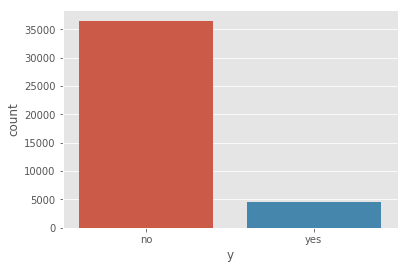

In [0]:
print(data.y.value_counts())
sns.countplot(x='y', data=data)

### This is highly imbalanced dataset accuracy can't work well with imbalanced data so we can choose AUC as metric

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


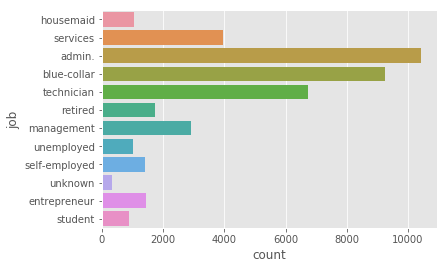

In [0]:
print(data.job.value_counts())
sns.countplot(y='job', data=data)

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


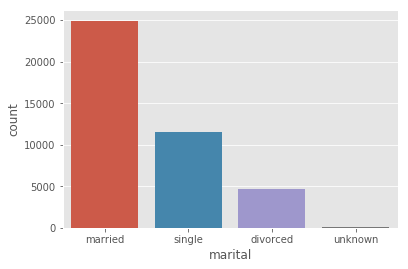

In [0]:
print(data.marital.value_counts())
sns.countplot(x='marital', data=data)

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64


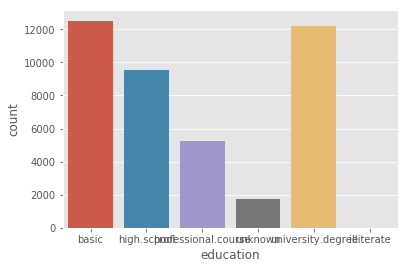

In [0]:
print(data.education.value_counts())
sns.countplot(x='education', data=data)

In [0]:
data.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic,no,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic,no,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [0]:
data.shape

(41188, 15)

# LabelEncoder 

In [0]:
y_valus ={'yes' : 1, 'no' : 0}
data['y'] = data['y'].map(lambda x: y_valus[x])
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [0]:
y = data['y']

In [0]:
data.drop(['y'], axis = 1, inplace = True) 

In [0]:
data.head(2)

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic,no,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,no,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [0]:
data.shape

(41188, 14)

In [0]:
y.head(2)

0    0
1    0
Name: y, dtype: int64

In [0]:
#splitting the data 
x_train, le_x_test, y_train, le_y_test = model_selection.train_test_split(data, y, test_size=0.2, random_state=0)
le_x_train, le_x_cv, le_y_train, le_y_cv = model_selection.train_test_split(x_train, y_train, test_size=0.2)

In [0]:
print("the shape of x_train data,{} and shape of x_test data {}:".format(le_x_train.shape,le_x_test.shape))
print("the shape of y_train data,{} and shape of y_test data {}:".format(le_y_train.shape,le_y_test.shape))
print("the shape of x_cv data,{} and shape of y_cv data {}:".format(le_x_cv.shape,le_y_cv.shape))

the shape of x_train data,(26360, 14) and shape of x_test data (8238, 14):
the shape of y_train data,(26360,) and shape of y_test data (8238,):
the shape of x_cv data,(6590, 14) and shape of y_cv data (6590,):


In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [0]:
le.fit(data['job'])

LabelEncoder()

In [0]:
le_x_train.job = le.transform(le_x_train.job)
le_x_test.job = le.transform(le_x_test.job)
le_x_cv.job = le.transform(le_x_cv.job)

In [0]:
le = LabelEncoder()
le.fit(data['marital'])
le_x_train.marital = le.transform(le_x_train.marital)
le_x_test.marital = le.transform(le_x_test.marital)
le_x_cv.marital = le.transform(le_x_cv.marital)

In [0]:
le = LabelEncoder()
le.fit(data['education'])
le_x_train.education = le.transform(le_x_train.education)
le_x_test.education = le.transform(le_x_test.education)
le_x_cv.education = le.transform(le_x_cv.education)

In [0]:
le = LabelEncoder()
le.fit(data['housing'])
le_x_train.housing = le.transform(le_x_train.housing)
le_x_test.housing = le.transform(le_x_test.housing)
le_x_cv.housing = le.transform(le_x_cv.housing)

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
le = LabelEncoder()
le.fit(data['loan'])
le_x_train.loan = le.transform(le_x_train.loan)
le_x_test.loan = le.transform(le_x_test.loan)
le_x_cv.loan = le.transform(le_x_cv.loan)

In [0]:
le = LabelEncoder()
le.fit(data['poutcome'])
le_x_train.poutcome = le.transform(le_x_train.poutcome)
le_x_test.poutcome = le.transform(le_x_test.poutcome)
le_x_cv.poutcome = le.transform(le_x_cv.poutcome)

In [0]:
le_x_train.head(2)

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
34079,48,1,1,0,2,0,2,0,1,-1.8,92.893,-46.2,1.281,5099.1
29456,53,1,1,1,2,2,4,0,1,-1.8,93.075,-47.1,1.405,5099.1


# Machine Learning Models

## Applying KNN Brute Force Algorithm

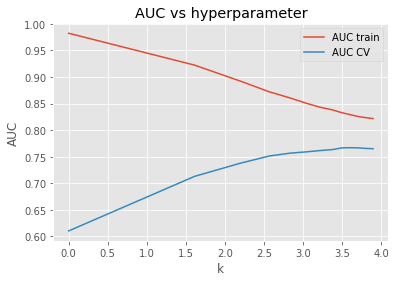

optimal alpha for which auc is maximum :  37


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import math

k = list(range(1,50,4))

train_auc = []
cv_auc = []

for i in k:
    clf = KNeighborsClassifier(n_neighbors = i,algorithm='brute')
    clf.fit(le_x_train,le_y_train)
    prob_cv = clf.predict_proba(le_x_cv)[:,1]
    cv_auc.append(roc_auc_score(le_y_cv,prob_cv))
    prob_train = clf.predict_proba(le_x_train)[:,1]
    train_auc.append(roc_auc_score(le_y_train,prob_train))
optimal_k = k[cv_auc.index(max(cv_auc))]
k = [math.log(x) for x in k]

#plot auc vs alpha
x = plt.subplot( )
x.plot(k, train_auc, label='AUC train')
x.plot(k, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_k)


In [0]:
from sklearn.metrics import confusion_matrix

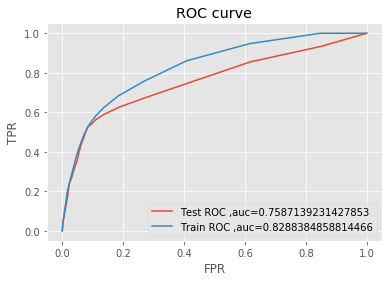

AUC on Test data is 0.7587139231427853
AUC on Train data is 0.8288384858814466
---------------------------


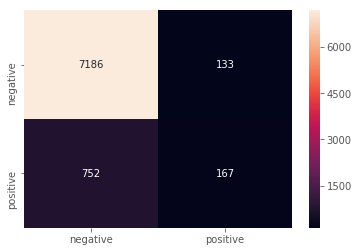

In [0]:
#Testing AUC on Test data
clf = KNeighborsClassifier(n_neighbors = optimal_k,algorithm='brute')
clf.fit(le_x_train,le_y_train)
pred_test = clf.predict_proba(le_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(le_y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [0]:
results=pd.DataFrame(columns=['model', 'Classifier' ,"hyper perameter", 'Train-AUC', 'Test-AUC' ])
new = ['KNN with Brute force','KNeighborsClassifier',"k = 37",0.8288,0.7587]
results.loc[0] = new

## Applying KNN kd-Tree

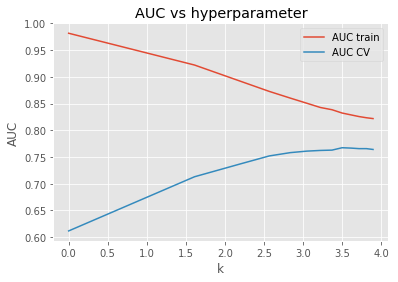

optimal alpha for which auc is maximum :  33


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import math

k = list(range(1,50,4))

train_auc = []
cv_auc = []

for i in k:
    clf = KNeighborsClassifier(n_neighbors = i,algorithm='kd_tree')
    clf.fit(le_x_train,le_y_train)
    prob_cv = clf.predict_proba(le_x_cv)[:,1]
    cv_auc.append(roc_auc_score(le_y_cv,prob_cv))
    prob_train = clf.predict_proba(le_x_train)[:,1]
    train_auc.append(roc_auc_score(le_y_train,prob_train))
optimal_k = k[cv_auc.index(max(cv_auc))]
k = [math.log(x) for x in k]

#plot auc vs alpha
x = plt.subplot( )
x.plot(k, train_auc, label='AUC train')
x.plot(k, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_k)


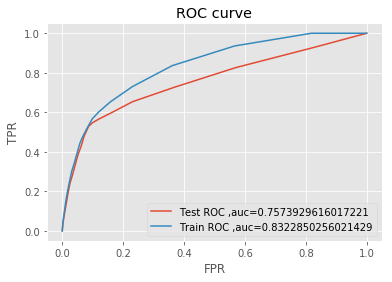

AUC on Test data is 0.7573929616017221
AUC on Train data is 0.8322850256021429
---------------------------


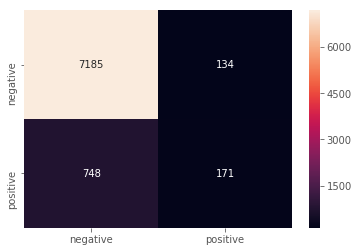

In [0]:
#Testing AUC on Test data
clf = KNeighborsClassifier(n_neighbors = optimal_k,algorithm='kd_tree')
clf.fit(le_x_train,le_y_train)
pred_test = clf.predict_proba(le_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(le_y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [0]:
new = ['KNN with kd-tree','KNeighborsClassifier',"k = 33",0.8322,0.7573]
results.loc[1] = new

## Applying Logistic Regression with L1 regularization 

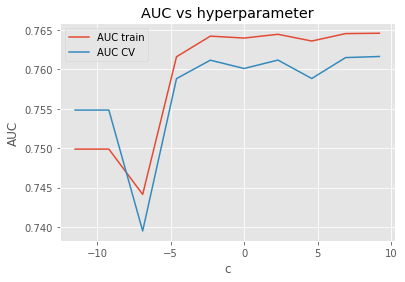

optimal c for which auc is maximum :  10000


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import math

c = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:
    clf = LogisticRegression(penalty='l1',C=i)
    clf.fit(le_x_train,le_y_train)
    prob_cv = clf.predict_proba(le_x_cv)[:,1]
    cv_auc.append(roc_auc_score(le_y_cv,prob_cv))
    prob_train = clf.predict_proba(le_x_train)[:,1]
    train_auc.append(roc_auc_score(le_y_train,prob_train))
optimal_c= c[cv_auc.index(max(cv_auc))]
c = [math.log(x) for x in c]

#plot auc vs alpha
x = plt.subplot( )
x.plot(c, train_auc, label='AUC train')
x.plot(c, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('c')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal c for which auc is maximum : ',optimal_c)

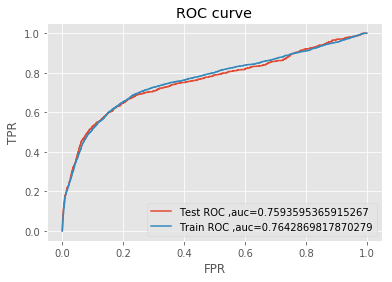

AUC on Test data is 0.7593595365915267
AUC on Train data is 0.7642869817870279
---------------------------


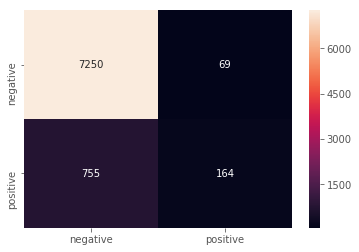

In [0]:
#Testing AUC on Test data
clf = LogisticRegression(penalty='l1',C=optimal_c)
clf.fit(le_x_train,le_y_train)
pred_test = clf.predict_proba(le_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(le_y_train,pred_train) 


#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
from sklearn.metrics import confusion_matrix
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")



####  Top 5 important features of subscribed class

In [0]:
all_features = x_train.columns


In [0]:
all_features

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'campaign',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [0]:
weight = clf.coef_
pos_indx = np.argsort(weight)[:,::-1]

In [0]:
weight = clf.coef_
pos_indx = np.argsort(weight)[:,::-1]

neg_indx = np.argsort(weight)

print('Top 5 subscribed features :')
for i in list(pos_indx[0][0:5]):
    print(all_features[i])
    

Top 5 subscribed features :
poutcome
previous
marital
cons.price.idx
education


In [0]:
new = ['Logistic Regression with L1','LogisticRegression',"c = 10000",0.7642,0.7593]
results.loc[2] = new

## Applying Logistic Regression with L2 regularization

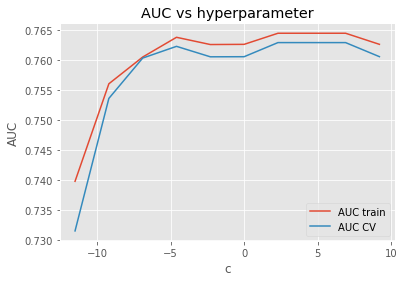

optimal c for which auc is maximum :  10


In [0]:
c = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:
    clf = LogisticRegression(penalty='l2',C=i)
    clf.fit(le_x_train,le_y_train)
    prob_cv = clf.predict_proba(le_x_cv)[:,1]
    cv_auc.append(roc_auc_score(le_y_cv,prob_cv))
    prob_train = clf.predict_proba(le_x_train)[:,1]
    train_auc.append(roc_auc_score(le_y_train,prob_train))
optimal_c= c[cv_auc.index(max(cv_auc))]
c = [math.log(x) for x in c]

#plot auc vs alpha
x = plt.subplot( )
x.plot(c, train_auc, label='AUC train')
x.plot(c, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('c')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal c for which auc is maximum : ',optimal_c)

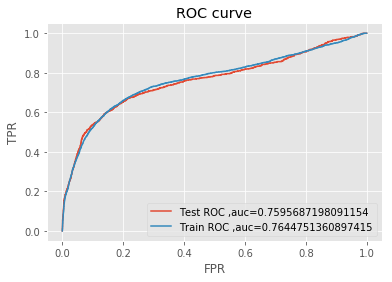

AUC on Test data is 0.7595687198091154
AUC on Train data is 0.7644751360897415
---------------------------


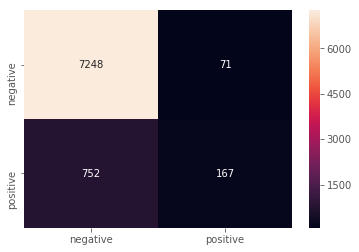

In [0]:
#Testing AUC on Test data
clf = LogisticRegression(penalty='l2',C=optimal_c)
clf.fit(le_x_train,le_y_train)
pred_test = clf.predict_proba(le_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(le_y_train,pred_train) 


#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")


####  Top 5 important features of subscribed class

In [0]:
all_features = x_train.columns


In [0]:
weight = clf.coef_
pos_indx = np.argsort(weight)[:,::-1]

neg_indx = np.argsort(weight)

print('Top 5 subscribed features :')
for i in list(pos_indx[0][0:5]):
    print(all_features[i])
    

Top 5 subscribed features :
poutcome
cons.price.idx
previous
marital
education


#### Top 5 important features of not subscribed class

In [0]:
print('Top 5 not subscribed features :')
for i in list(neg_indx[0][:5]):
    print(all_features[i])

Top 5 not subscribed features :
emp.var.rate
euribor3m
campaign
loan
housing


In [0]:
new = ['Logistic Regression with L2','LogisticRegression',"c = 10",0.7644,0.7595]
results.loc[3] = new

## Applying Linear SVM 

In [0]:
import warnings
warnings.filterwarnings("ignore")

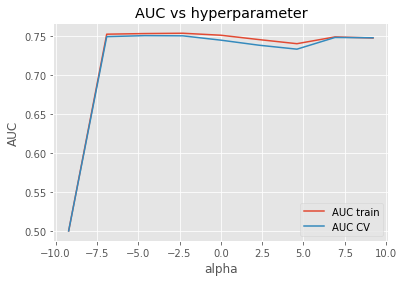

optimal alpha for which auc is maximum :  0.01


In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
import math

alpha = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001]

train_auc = []
cv_auc = []

for i in alpha:
    model = SGDClassifier(alpha=i, loss = "hinge") 
    clf = CalibratedClassifierCV(model, cv=3)
    clf.fit(le_x_train,le_y_train)
    prob_cv = clf.predict_proba(le_x_cv)[:,1]
    cv_auc.append(roc_auc_score(le_y_cv,prob_cv))
    prob_train = clf.predict_proba(le_x_train)[:,1]
    train_auc.append(roc_auc_score(le_y_train,prob_train))
optimal_alpha= alpha[cv_auc.index(max(cv_auc))]
alpha=[math.log(x) for x in alpha]

#plot auc vs alpha
x = plt.subplot( )
x.plot(alpha, train_auc, label='AUC train')
x.plot(alpha, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('alpha')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_alpha)

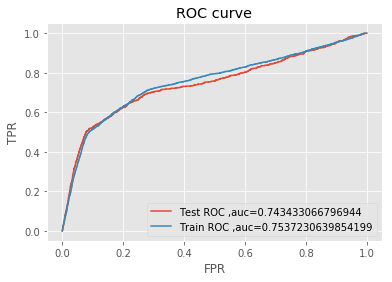

AUC on Test data is 0.743433066796944
AUC on Train data is 0.7537230639854199
---------------------------


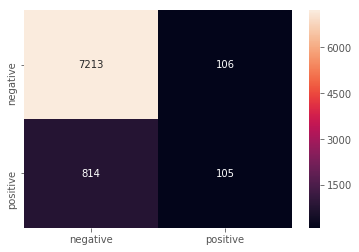

In [0]:
#Testing AUC on Test data
model = SGDClassifier(alpha = optimal_alpha)
clf = CalibratedClassifierCV(model, cv=3)
clf.fit(le_x_train,le_y_train)
pred_test = clf.predict_proba(le_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(le_y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")



In [0]:
all_features = x_train.columns
clf = SGDClassifier(alpha=0.01)
clf.fit(le_x_train,le_y_train)
weight = clf.coef_
positive_index=np.argsort(weight)[:,::-1]

negative_index=np.argsort(weight)

print('Top 10 subscribed features :')
for i in list(positive_index[0][0:10]):
    print(all_features[i])
    
print("----------------")

#top 10 negative features
print('Top 10 not subscribed features :')
for i in list(negative_index[0][0:10]):
    print(all_features[i])

Top 10 subscribed features :
cons.price.idx
cons.conf.idx
poutcome
previous
education
marital
age
job
housing
nr.employed
----------------
Top 10 not subscribed features :
euribor3m
emp.var.rate
campaign
loan
nr.employed
housing
job
age
marital
education


In [0]:
new = ['Linear SVM','SGDClassifier',"alpha = 0.01",0.7537,0.7434]
results.loc[4] = new

## Applying RBF SVM

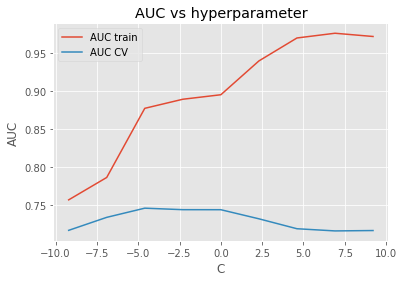

optimal C for which auc is maximum :  [9.210340371976184, 6.907755278982137, 4.605170185988092, 2.302585092994046, 0.0, -2.3025850929940455, -4.605170185988091, -6.907755278982137, -9.210340371976182]


In [0]:
from sklearn.svm import SVC
C = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001]

train_auc = []
cv_auc = []

for i in C:
    model = SVC(C=i) 
    clf = CalibratedClassifierCV(model, cv=3)
    clf.fit(le_x_train,le_y_train)
    prob_cv = clf.predict_proba(le_x_cv)[:,1]
    cv_auc.append(roc_auc_score(le_y_cv,prob_cv))
    prob_train = clf.predict_proba(le_x_train)[:,1]
    train_auc.append(roc_auc_score(le_y_train,prob_train))
optimal_C= C[cv_auc.index(max(cv_auc))]
C=[math.log(x) for x in C]

#plot auc vs alpha
x = plt.subplot( )
x.plot(C, train_auc, label='AUC train')
x.plot(C, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('C')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal C for which auc is maximum : ',C)

In [0]:
print('optimal C for which auc is maximum : ',optimal_C)

optimal C for which auc is maximum :  0.01


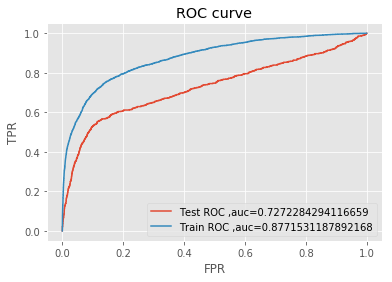

AUC on Test data is 0.7272284294116659
AUC on Train data is 0.8771531187892168
---------------------------


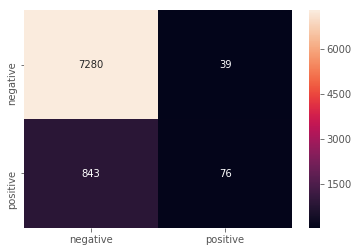

In [0]:
#Testing AUC on Test data
model =SVC(C = optimal_C)
clf = CalibratedClassifierCV(model, cv=3)
clf.fit(le_x_train,le_y_train)
pred_test = clf.predict_proba(le_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(le_y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [0]:
new = ['RBF SVM','SVC',"c = 0.01",0.8771,0.7272]
results.loc[5] = new

## Applying Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
min_samples =  [5, 10, 100, 500]


param_grid={'min_samples_split':min_samples , 'max_depth':dept}
clf = DecisionTreeClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(le_x_train,le_y_train)
print("optimal min_samples_split",model.best_estimator_.min_samples_split)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal min_samples_split 500
optimal max_depth 10


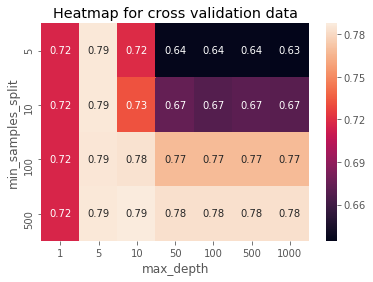

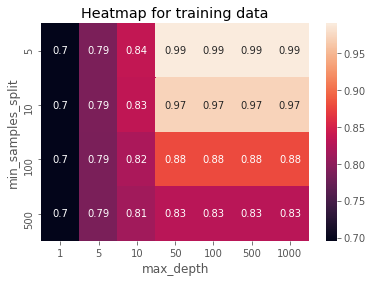

In [0]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in min_samples:
    for d in dept:
        clf = DecisionTreeClassifier(max_depth = d,min_samples_split = n)
        clf.fit(le_x_train,le_y_train)
        pred_cv = clf.predict_proba(le_x_cv)[:,1]
        pred_train = clf.predict_proba(le_x_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(le_y_cv,pred_cv))
        train_auc.append(roc_auc_score(le_y_train,pred_train))
        
#Heatmap for cross validation data        
data = pd.DataFrame({'min_samples_split': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("min_samples_split", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'min_samples_split': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("min_samples_split", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training data')
plt.show()

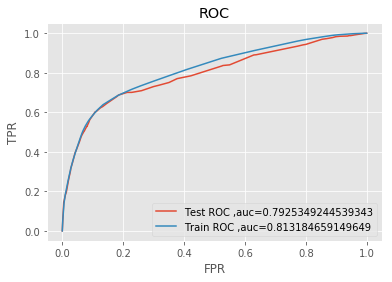

AUC on Test data is 0.7925349244539343
AUC on Train data is 0.813184659149649
---------------------------


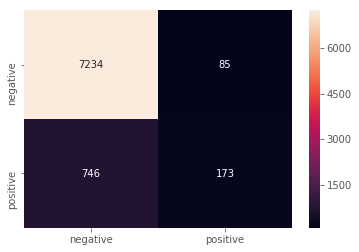

In [0]:
#training our model for max_depth=50,min_samples_split=500
clf = DecisionTreeClassifier(max_depth = 10,min_samples_split = 500)
clf.fit(le_x_train,le_y_train)
pred_test =clf.predict_proba(le_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(le_y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [0]:
#Top important features
all_features = x_train.columns

feat = clf.feature_importances_
features = np.argsort(feat)[::-1]
for i in features[0:20]:
    print(all_features[i])

nr.employed
poutcome
cons.conf.idx
euribor3m
age
emp.var.rate
campaign
education
cons.price.idx
marital
previous
job
loan
housing


In [0]:
new = ['Decision Tree','DecisionTreeClassifier',"max_depth = 10 & min_samples_split = 500",0.8131,0.7925]
results.loc[6] = new

## Applying Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]


param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(le_x_train,le_y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal n_estimators 100
optimal max_depth 10


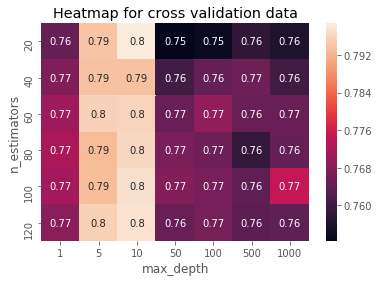

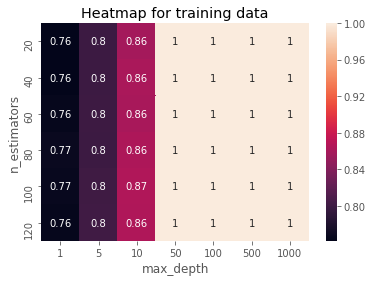

In [0]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in n_estimators:
    for d in dept:
        clf = RandomForestClassifier(max_depth = d,n_estimators = n)
        clf.fit(le_x_train,le_y_train)
        pred_cv = clf.predict_proba(le_x_cv)[:,1]
        pred_train = clf.predict_proba(le_x_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(le_y_cv,pred_cv))
        train_auc.append(roc_auc_score(le_y_train,pred_train))
        
#Heatmap for cross validation data        
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training data')
plt.show()

In [0]:
optimal_n_estimators = model.best_estimator_.n_estimators
optimal_max_depth = model.best_estimator_.max_depth

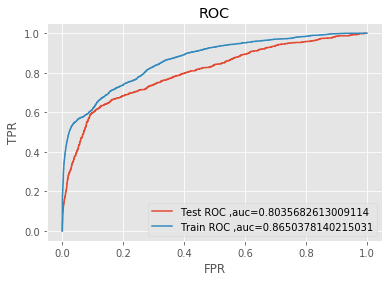

AUC on Test data is 0.8035682613009114
AUC on Train data is 0.8650378140215031
---------------------------


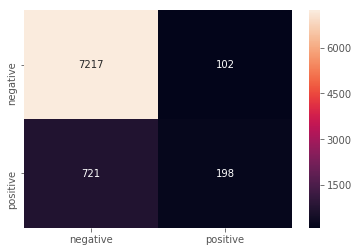

In [0]:
#training our model for max_depth=10,n_estimators = 120
clf = RandomForestClassifier(max_depth = optimal_max_depth,n_estimators = optimal_n_estimators)
clf.fit(le_x_train,le_y_train)
pred_test =clf.predict_proba(le_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(le_y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

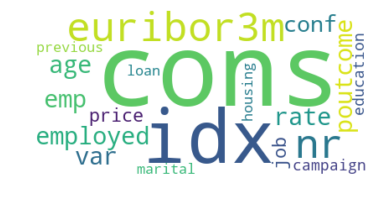

In [0]:
# worldcloud of top important features
all_features = x_train.columns
data = ''
feat = clf.feature_importances_
features = np.argsort(feat)[::-1]
for i in features[0:20]:
    data += all_features[i]
    data += ' '
    
    
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(data)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
new = ['Random Forest','RandomForestClassifier',"max_depth = 10 & min_samples_split = 100",0.8650, 0.8035]
results.loc[7] = new

## Applying XGBOOST

In [0]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]


param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = XGBClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(le_x_train,le_y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal_n_estimators = model.best_estimator_.n_estimators
optimal_max_depth = model.best_estimator_.max_depth


optimal n_estimators 60
optimal max_depth 5


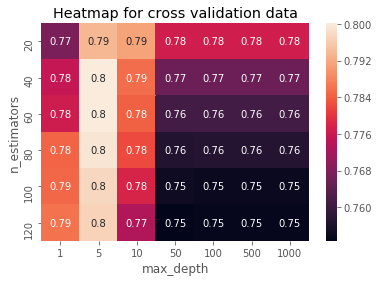

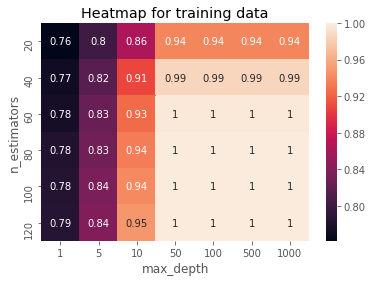

In [0]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in n_estimators:
    for d in dept:
        clf = XGBClassifier(max_depth = d,n_estimators = n)
        clf.fit(le_x_train,le_y_train)
        pred_cv = clf.predict_proba(le_x_cv)[:,1]
        pred_train = clf.predict_proba(le_x_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(le_y_cv,pred_cv))
        train_auc.append(roc_auc_score(le_y_train,pred_train))
optimal_depth=Y[cv_auc.index(max(cv_auc))]   
optimal_n_estimator=X[cv_auc.index(max(cv_auc))]
        
#Heatmap for cross validation data        
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training data')
plt.show()

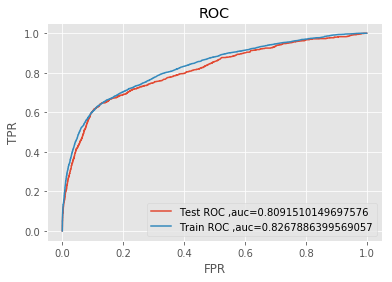

AUC on Test data is 0.8091510149697576
AUC on Train data is 0.8267886399569057
---------------------------


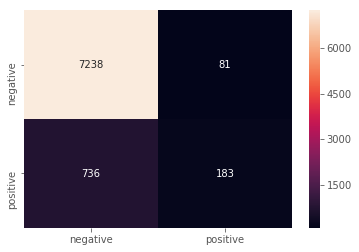

In [0]:
#training our model for max_depth=50,min_samples_split=500
clf = XGBClassifier(max_depth = 5,n_estimators = 60)
clf.fit(le_x_train,le_y_train)
pred_test =clf.predict_proba(le_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(le_y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")


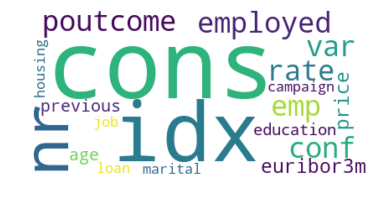

In [0]:
# worldcloud of top 20 important features
all_features = x_train.columns
data = ''
feat = clf.feature_importances_
features = np.argsort(feat)[::-1]
for i in features[0:20]:
    data += all_features[i]
    data += ' '
    
    
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(data)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
new = ['XGBOOST','XGBClassifier',"max_depth = 5 & n_estimators = 60",0.8267,0.8091]
results.loc[8] = new

# OneHotEncoder

In [0]:
y_valus ={'yes' : 1, 'no' : 0}
data['y'] = data['y'].map(lambda x: y_valus[x])
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [0]:
y = data['y']

In [0]:
data.drop(['y'], axis = 1, inplace = True) 

In [0]:
data.shape

(41188, 14)

In [0]:
y.head(2)

0    0
1    0
Name: y, dtype: int64

In [0]:
#splitting the data 
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, y, test_size=0.2, random_state=0)
x_train, x_cv, y_train, y_cv = model_selection.train_test_split(x_train, y_train, test_size=0.2)

In [0]:
print("the shape of x_train data,{} and shape of x_test data {}:".format(x_train.shape,x_test.shape))
print("the shape of y_train data,{} and shape of y_test data {}:".format(y_train.shape,y_test.shape))
print("the shape of x_cv data,{} and shape of y_cv data {}:".format(x_cv.shape,y_cv.shape))

the shape of x_train data,(26360, 14) and shape of x_test data (8238, 14):
the shape of y_train data,(26360,) and shape of y_test data (8238,):
the shape of x_cv data,(6590, 14) and shape of y_cv data (6590,):


In [0]:
import sklearn

In [0]:
sklearn.preprocessing.OneHotEncoder

sklearn.preprocessing._encoders.OneHotEncoder

In [0]:
#Numerical features
real_feature_x_train_age = ['age']
real_feature_x_train_campaign = ['campaign']
real_feature_x_train_previous = ['previous']
real_feature_x_train_emp_var_rate = ['emp.var.rate']
real_feature_x_train_cons_price_idx = ['cons.price.idx']
real_feature_x_train_cons_conf_idx = ['cons.conf.idx']
real_feature_x_train_euribor3m = ['euribor3m']
real_feature_x_train_nr_employed = ['nr.employed']

real_feature_x_test_age = ['age']
real_feature_x_test_campaign = ['campaign']
real_feature_x_test_previous = ['previous']
real_feature_x_test_emp_var_rate = ['emp.var.rate']
real_feature_x_test_cons_price_idx = ['cons.price.idx']
real_feature_x_test_cons_conf_idx = ['cons.conf.idx']
real_feature_x_test_euribor3m = ['euribor3m']
real_feature_x_test_nr_employed = ['nr.employed']

real_feature_x_cv_age = ['age']
real_feature_x_cv_campaign = ['campaign']
real_feature_x_cv_previous = ['previous']
real_feature_x_cv_emp_var_rate = ['emp.var.rate']
real_feature_x_cv_cons_price_idx = ['cons.price.idx']
real_feature_x_cv_cons_conf_idx = ['cons.conf.idx']
real_feature_x_cv_euribor3m = ['euribor3m']
real_feature_x_cv_nr_employed = ['nr.employed']


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
SS = StandardScaler()
x_train_real_feature_age_scale = SS.fit_transform(x_train[real_feature_x_train_age])
x_test_real_feature_age_scale = SS.fit_transform(x_test[real_feature_x_test_age])
x_cv_real_feature_age_scale = SS.fit_transform(x_cv[real_feature_x_cv_age])

In [0]:
x_train_real_feature_campaign_scale = SS.fit_transform(x_train[real_feature_x_train_campaign])
x_test_real_feature_campaign_scale = SS.fit_transform(x_test[real_feature_x_test_campaign])
x_cv_real_feature_campaign_scale = SS.fit_transform(x_cv[real_feature_x_cv_campaign])

In [0]:
x_train_real_feature_previous_scale = SS.fit_transform(x_train[real_feature_x_train_previous])
x_test_real_feature_previous_scale = SS.fit_transform(x_test[real_feature_x_test_previous])
x_cv_real_feature_previous_scale = SS.fit_transform(x_cv[real_feature_x_cv_previous])

In [0]:
x_train_real_feature_emp_var_rate_scale = SS.fit_transform(x_train[real_feature_x_train_emp_var_rate])
x_test_real_feature_emp_var_rate_scale = SS.fit_transform(x_test[real_feature_x_test_emp_var_rate])
x_cv_real_feature_emp_var_rate_scale = SS.fit_transform(x_cv[real_feature_x_cv_emp_var_rate])

In [0]:
x_train_real_feature_cons_price_idx_scale = SS.fit_transform(x_train[real_feature_x_train_cons_price_idx])
x_test_real_feature_cons_price_idx_scale = SS.fit_transform(x_test[real_feature_x_test_cons_price_idx])
x_cv_real_feature_cons_price_idx_scale = SS.fit_transform(x_cv[real_feature_x_cv_cons_price_idx])

In [0]:
x_train_real_feature_cons_conf_idx_scale = SS.fit_transform(x_train[real_feature_x_train_cons_conf_idx])
x_test_real_feature_cons_conf_idx_scale = SS.fit_transform(x_test[real_feature_x_test_cons_conf_idx])
x_cv_real_feature_cons_conf_idx_scale = SS.fit_transform(x_cv[real_feature_x_cv_cons_conf_idx])

In [0]:
x_train_real_feature_euribor3m_scale = SS.fit_transform(x_train[real_feature_x_train_euribor3m])
x_test_real_feature_euribor3m_scale = SS.fit_transform(x_test[real_feature_x_test_euribor3m])
x_cv_real_feature_euribor3m_scale = SS.fit_transform(x_cv[real_feature_x_cv_euribor3m])

In [0]:
x_train_real_feature_nr_employed_scale = SS.fit_transform(x_train[real_feature_x_train_nr_employed])
x_test_real_feature_nr_employed_scale = SS.fit_transform(x_test[real_feature_x_test_nr_employed])
x_cv_real_feature_nr_employed_scale = SS.fit_transform(x_cv[real_feature_x_cv_nr_employed])

In [0]:
real_feature_x_train = np.concatenate((x_train_real_feature_age_scale,x_train_real_feature_campaign_scale,x_train_real_feature_previous_scale,x_train_real_feature_emp_var_rate_scale,x_train_real_feature_cons_price_idx_scale,x_train_real_feature_cons_conf_idx_scale,x_train_real_feature_euribor3m_scale,x_train_real_feature_nr_employed_scale),axis = 1)
real_feature_x_test = np.concatenate((x_test_real_feature_age_scale,x_test_real_feature_campaign_scale,x_test_real_feature_previous_scale,x_test_real_feature_emp_var_rate_scale,x_test_real_feature_cons_price_idx_scale,x_test_real_feature_cons_conf_idx_scale,x_test_real_feature_euribor3m_scale,x_test_real_feature_nr_employed_scale),axis = 1)
real_feature_x_cv = np.concatenate((x_cv_real_feature_age_scale,x_cv_real_feature_campaign_scale,x_cv_real_feature_previous_scale,x_cv_real_feature_emp_var_rate_scale,x_cv_real_feature_cons_price_idx_scale,x_cv_real_feature_cons_conf_idx_scale,x_cv_real_feature_euribor3m_scale,x_cv_real_feature_nr_employed_scale),axis = 1)

In [0]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [0]:
cat_feat_x_train_job = x_train['job'].values
cat_feat_x_train_marital = x_train['marital'].values
cat_feat_x_train_education = x_train['education'].values
cat_feat_x_train_housing = x_train['housing'].values
cat_feat_x_train_loan = x_train['loan'].values
cat_feat_x_train_poutcome = x_train['poutcome'].values

cat_feat_x_test_job = x_test['job'].values
cat_feat_x_test_marital = x_test['marital'].values
cat_feat_x_test_education = x_test['education'].values
cat_feat_x_test_housing = x_test['housing'].values
cat_feat_x_test_loan = x_test['loan'].values
cat_feat_x_test_poutcome = x_test['poutcome'].values

cat_feat_x_cv_job = x_cv['job'].values
cat_feat_x_cv_marital = x_cv['marital'].values
cat_feat_x_cv_education = x_cv['education'].values
cat_feat_x_cv_housing = x_cv['housing'].values
cat_feat_x_cv_loan = x_cv['loan'].values
cat_feat_x_cv_poutcome = x_cv['poutcome'].values

In [0]:
x_train_job = cat_feat_x_train_job.reshape(-1,1)
x_test_job = cat_feat_x_test_job.reshape(-1,1)
x_cv_job = cat_feat_x_cv_job.reshape(-1,1)
ohe =  OneHotEncoder()
ohe.fit(x_train_job)
job_train = ohe.transform(x_train_job)
job_test = ohe.transform(x_test_job)
job_cv = ohe.transform(x_cv_job)

In [0]:
x_train_marital= cat_feat_x_train_marital.reshape(-1,1)
x_test_marital = cat_feat_x_test_marital.reshape(-1,1)
x_cv_marital = cat_feat_x_cv_marital.reshape(-1,1)
ohe =  OneHotEncoder()
ohe.fit(x_train_marital)
marital_train = ohe.transform(x_train_marital)
marital_test = ohe.transform(x_test_marital)
marital_cv = ohe.transform(x_cv_marital)

In [0]:
x_train_education= cat_feat_x_train_education.reshape(-1,1)
x_test_education = cat_feat_x_test_education.reshape(-1,1)
x_cv_education = cat_feat_x_cv_education.reshape(-1,1)
ohe =  OneHotEncoder()
ohe.fit(x_train_education)
education_train = ohe.transform(x_train_education)
education_test = ohe.transform(x_test_education)
education_cv = ohe.transform(x_cv_education)


In [0]:
x_train_housing= cat_feat_x_train_housing.reshape(-1,1)
x_test_housing = cat_feat_x_test_housing.reshape(-1,1)
x_cv_housing= cat_feat_x_cv_housing.reshape(-1,1)
ohe =  OneHotEncoder()
ohe.fit(x_train_housing)
housing_train = ohe.transform(x_train_housing)
housing_test = ohe.transform(x_test_housing)
housing_cv = ohe.transform(x_cv_housing)

In [0]:
x_train_loan = cat_feat_x_train_loan.reshape(-1,1)
x_test_loan = cat_feat_x_test_loan.reshape(-1,1)
x_cv_loan = cat_feat_x_cv_loan.reshape(-1,1)
ohe =  OneHotEncoder()
ohe.fit(x_train_loan)
loan_train = ohe.transform(x_train_loan)
loan_test = ohe.transform(x_test_loan)
loan_cv = ohe.transform(x_cv_loan)

In [0]:
x_train_poutcome = cat_feat_x_train_poutcome.reshape(-1,1)
x_test_poutcome = cat_feat_x_test_poutcome.reshape(-1,1)
x_cv_poutcome = cat_feat_x_cv_poutcome.reshape(-1,1)
ohe =  OneHotEncoder()
ohe.fit(x_train_poutcome)
poutcome_train = ohe.transform(x_train_poutcome)
poutcome_test = ohe.transform(x_test_poutcome)
poutcome_cv = ohe.transform(x_cv_poutcome)

In [0]:
#cat_feature_x_train = np.concatenate((job_train,marital_train,education_train,housing_train,loan_train,poutcome_train),axis = 1)
#cat_feature_x_train = np.concatenate((job_test,marital_test),axis = 1)
#cat_feature_x_cv = np.concatenate((job_cv,marital_cv,education_cv,housing_cv,loan_train,poutcome_cv),axis = 1)

In [0]:
 from scipy.sparse import hstack

In [0]:
cat_x_train = hstack([job_train,marital_train,education_train,housing_train,loan_train,poutcome_train]).tocsr()
cat_x_test = hstack([job_test,marital_test,education_test,housing_test,loan_test,poutcome_test]).tocsr()
cat_x_cv = hstack([job_cv,marital_cv,education_cv,housing_cv,loan_cv,poutcome_cv]).tocsr()

In [0]:
cat_x_train.shape

(26360, 31)

In [0]:
cat_x_test.shape

(8238, 31)

In [0]:
cat_x_cv.shape

(6590, 31)

In [0]:
ohe_x_train = hstack([cat_x_train,real_feature_x_train])
ohe_x_test = hstack([cat_x_test,real_feature_x_test])
ohe_x_cv = hstack([cat_x_cv,real_feature_x_cv])

# Machine Learning Models

## Applying KNN Brute Force Algorithm

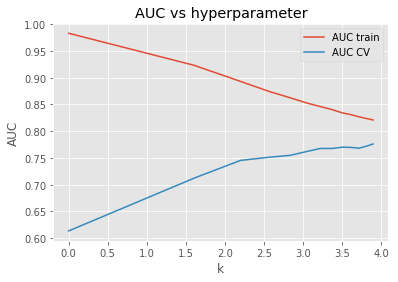

optimal alpha for which auc is maximum :  49


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import math

k = list(range(1,50,4))

train_auc = []
cv_auc = []

for i in k:
    clf = KNeighborsClassifier(n_neighbors = i,algorithm='brute')
    clf.fit(ohe_x_train,y_train)
    prob_cv = clf.predict_proba(ohe_x_cv)[:,1]
    cv_auc.append(roc_auc_score(y_cv,prob_cv))
    prob_train = clf.predict_proba(ohe_x_train)[:,1]
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_k = k[cv_auc.index(max(cv_auc))]
k = [math.log(x) for x in k]

#plot auc vs alpha
x = plt.subplot( )
x.plot(k, train_auc, label='AUC train')
x.plot(k, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_k)


In [0]:
from sklearn.metrics import confusion_matrix

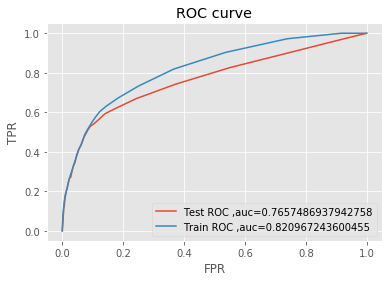

AUC on Test data is 0.7657486937942758
AUC on Train data is 0.820967243600455
---------------------------


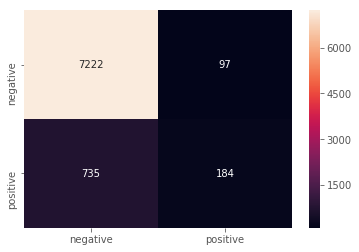

In [0]:
#Testing AUC on Test data
clf = KNeighborsClassifier(n_neighbors = optimal_k,algorithm='brute')
clf.fit(ohe_x_train,y_train)
pred_test = clf.predict_proba(ohe_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(ohe_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [0]:
results1 = pd.DataFrame(columns=['model', 'Classifier' ,"hyper perameter", 'Train-AUC', 'Test-AUC' ])
new = ['KNN with Brute force','KNeighborsClassifier',"k = 49",0.8209,0.7657]
results1.loc[0] = new

## Applying KNN kd-Tree

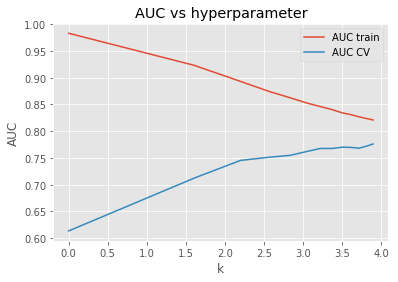

optimal alpha for which auc is maximum :  49


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import math

k = list(range(1,50,4))

train_auc = []
cv_auc = []

for i in k:
    clf = KNeighborsClassifier(n_neighbors = i,algorithm='kd_tree')
    clf.fit(ohe_x_train,y_train)
    prob_cv = clf.predict_proba(ohe_x_cv)[:,1]
    cv_auc.append(roc_auc_score(y_cv,prob_cv))
    prob_train = clf.predict_proba(ohe_x_train)[:,1]
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_k = k[cv_auc.index(max(cv_auc))]
k = [math.log(x) for x in k]

#plot auc vs alpha
x = plt.subplot( )
x.plot(k, train_auc, label='AUC train')
x.plot(k, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_k)


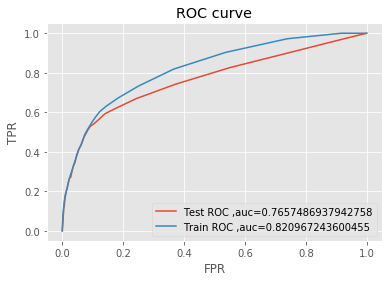

AUC on Test data is 0.7657486937942758
AUC on Train data is 0.820967243600455
---------------------------


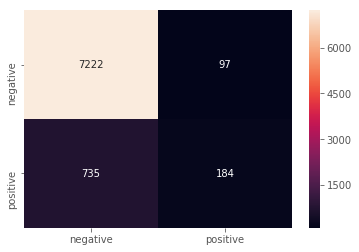

In [0]:
#Testing AUC on Test data
clf = KNeighborsClassifier(n_neighbors = optimal_k,algorithm='kd_tree')
clf.fit(ohe_x_train,y_train)
pred_test = clf.predict_proba(ohe_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(ohe_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [0]:
new = ['KNN with kd-tree','KNeighborsClassifier',"k = 49",0.8209,0.7657]
results1.loc[1] = new

## Applying Logistic Regression with L1 regularization 

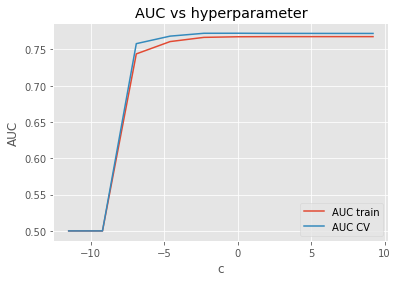

optimal c for which auc is maximum :  1


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import math

c = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:
    clf = LogisticRegression(penalty='l1',C=i)
    clf.fit(ohe_x_train,y_train)
    prob_cv = clf.predict_proba(ohe_x_cv)[:,1]
    cv_auc.append(roc_auc_score(y_cv,prob_cv))
    prob_train = clf.predict_proba(ohe_x_train)[:,1]
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_c= c[cv_auc.index(max(cv_auc))]
c = [math.log(x) for x in c]

#plot auc vs alpha
x = plt.subplot( )
x.plot(c, train_auc, label='AUC train')
x.plot(c, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('c')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal c for which auc is maximum : ',optimal_c)

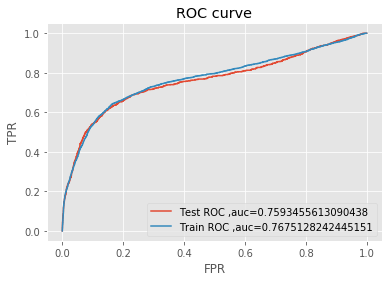

AUC on Test data is 0.7593455613090438
AUC on Train data is 0.7675128242445151
---------------------------


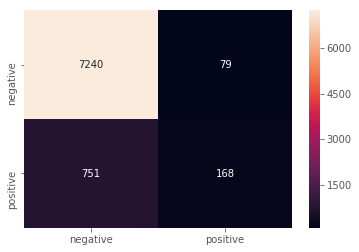

In [0]:
#Testing AUC on Test data
clf = LogisticRegression(penalty='l1',C=optimal_c)
clf.fit(ohe_x_train,y_train)
pred_test = clf.predict_proba(ohe_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(ohe_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train) 


#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
from sklearn.metrics import confusion_matrix
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")



In [0]:
new = ['Logistic Regression with L1','LogisticRegression',"c = 1",0.7675,0.7593]
results1.loc[2] = new

## Applying Logistic Regression with L2 regularization

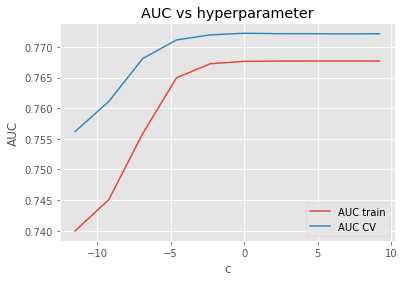

optimal c for which auc is maximum :  1


In [0]:
c = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:
    clf = LogisticRegression(penalty='l2',C=i)
    clf.fit(ohe_x_train,y_train)
    prob_cv = clf.predict_proba(ohe_x_cv)[:,1]
    cv_auc.append(roc_auc_score(y_cv,prob_cv))
    prob_train = clf.predict_proba(ohe_x_train)[:,1]
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_c= c[cv_auc.index(max(cv_auc))]
c = [math.log(x) for x in c]

#plot auc vs alpha
x = plt.subplot( )
x.plot(c, train_auc, label='AUC train')
x.plot(c, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('c')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal c for which auc is maximum : ',optimal_c)

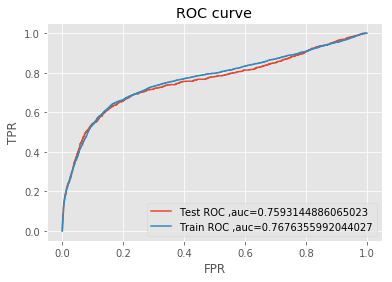

AUC on Test data is 0.7593144886065023
AUC on Train data is 0.7676355992044027
---------------------------


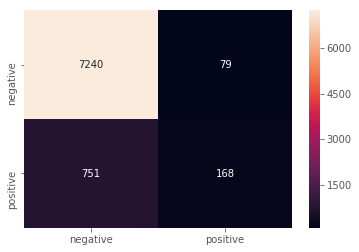

In [0]:
#Testing AUC on Test data
clf = LogisticRegression(penalty='l2',C=optimal_c)
clf.fit(ohe_x_train,y_train)
pred_test = clf.predict_proba(ohe_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(ohe_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train) 


#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")


In [0]:
new = ['Logistic Regression with L2','LogisticRegression',"c = 1",0.7676,0.7593]
results1.loc[3] = new

## Applying Linear SVM 

In [0]:
import warnings
warnings.filterwarnings("ignore")

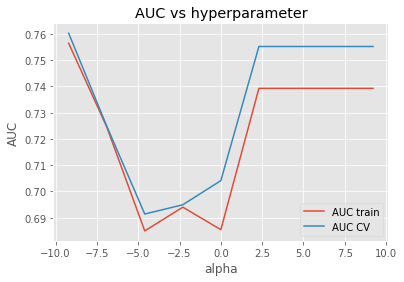

optimal alpha for which auc is maximum :  0.0001


In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
import math

alpha = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001]

train_auc = []
cv_auc = []

for i in alpha:
    model = SGDClassifier(alpha=i, loss = "hinge") 
    clf = CalibratedClassifierCV(model, cv=3)
    clf.fit(ohe_x_train,y_train)
    prob_cv = clf.predict_proba(ohe_x_cv)[:,1]
    cv_auc.append(roc_auc_score(y_cv,prob_cv))
    prob_train = clf.predict_proba(ohe_x_train)[:,1]
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_alpha= alpha[cv_auc.index(max(cv_auc))]
alpha=[math.log(x) for x in alpha]

#plot auc vs alpha
x = plt.subplot( )
x.plot(alpha, train_auc, label='AUC train')
x.plot(alpha, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('alpha')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_alpha)

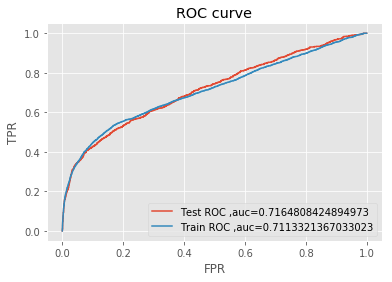

AUC on Test data is 0.7164808424894973
AUC on Train data is 0.7113321367033023
---------------------------


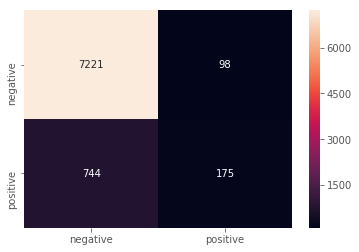

In [0]:
#Testing AUC on Test data
model = SGDClassifier(alpha = optimal_alpha)
clf = CalibratedClassifierCV(model, cv=3)
clf.fit(ohe_x_train,y_train)
pred_test = clf.predict_proba(ohe_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(ohe_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")



In [0]:
new = ['Linear SVM','SGDClassifier',"alpha = 0.0001",0.7113,0.7164]
results1.loc[4] = new

## Applying RBF SVM

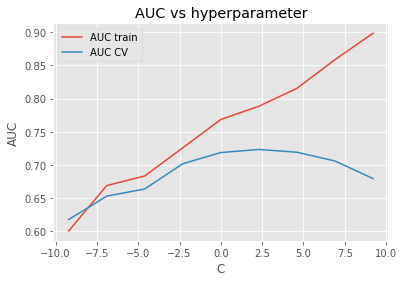

optimal C for which auc is maximum :  [9.210340371976184, 6.907755278982137, 4.605170185988092, 2.302585092994046, 0.0, -2.3025850929940455, -4.605170185988091, -6.907755278982137, -9.210340371976182]


In [0]:
from sklearn.svm import SVC
C = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001]

train_auc = []
cv_auc = []

for i in C:
    model = SVC(C=i) 
    clf = CalibratedClassifierCV(model, cv=3)
    clf.fit(ohe_x_train,y_train)
    prob_cv = clf.predict_proba(ohe_x_cv)[:,1]
    cv_auc.append(roc_auc_score(y_cv,prob_cv))
    prob_train = clf.predict_proba(ohe_x_train)[:,1]
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_C= C[cv_auc.index(max(cv_auc))]
C=[math.log(x) for x in C]

#plot auc vs alpha
x = plt.subplot( )
x.plot(C, train_auc, label='AUC train')
x.plot(C, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('C')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal C for which auc is maximum : ',C)

In [0]:
print('optimal C for which auc is maximum : ',optimal_C)

optimal C for which auc is maximum :  10


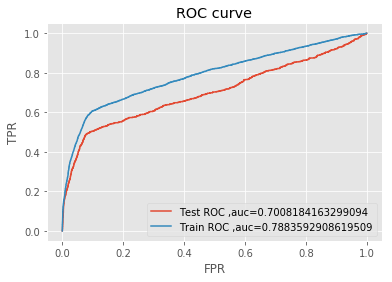

AUC on Test data is 0.7008184163299094
AUC on Train data is 0.7883592908619509
---------------------------


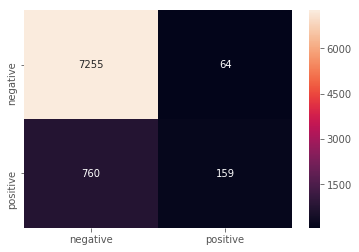

In [0]:
#Testing AUC on Test data
model =SVC(C = optimal_C)
clf = CalibratedClassifierCV(model, cv=3)
clf.fit(ohe_x_train,y_train)
pred_test = clf.predict_proba(ohe_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(ohe_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [0]:
new = ['RBF SVM','SVC',"alpha = 10 ",0.7883,0.7008]
results1.loc[5] = new

## Applying Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
min_samples =  [5, 10, 100, 500]


param_grid={'min_samples_split':min_samples , 'max_depth':dept}
clf = DecisionTreeClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(ohe_x_train,y_train)
print("optimal min_samples_split",model.best_estimator_.min_samples_split)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal min_samples_split 500
optimal max_depth 10


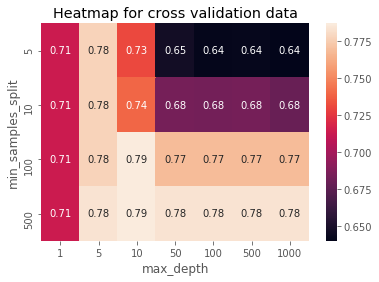

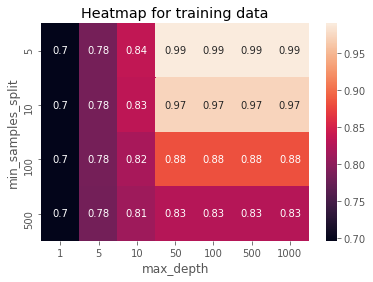

In [0]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in min_samples:
    for d in dept:
        clf = DecisionTreeClassifier(max_depth = d,min_samples_split = n)
        clf.fit(ohe_x_train,y_train)
        pred_cv = clf.predict_proba(ohe_x_cv)[:,1]
        pred_train = clf.predict_proba(ohe_x_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(y_cv,pred_cv))
        train_auc.append(roc_auc_score(y_train,pred_train))
        
#Heatmap for cross validation data        
data = pd.DataFrame({'min_samples_split': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("min_samples_split", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'min_samples_split': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("min_samples_split", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training data')
plt.show()

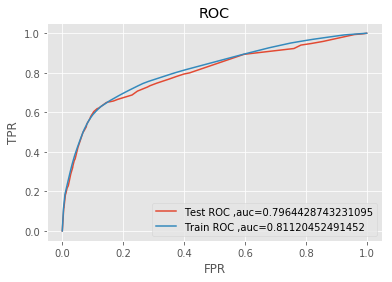

AUC on Test data is 0.7964428743231095
AUC on Train data is 0.81120452491452
---------------------------


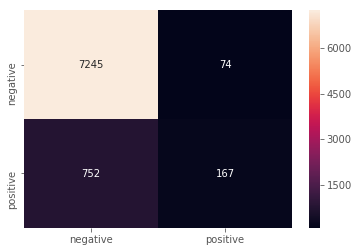

In [0]:
#training our model for max_depth=50,min_samples_split=500
clf = DecisionTreeClassifier(max_depth = 10,min_samples_split = 500)
clf.fit(ohe_x_train,y_train)
pred_test =clf.predict_proba(ohe_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(ohe_x_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [0]:
new = ['Decision Tree','DecisionTreeClassifier',"max_depth = 10 & min_samples_split = 500",0.8112,0.7964]
results1.loc[6] = new

## Applying Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]


param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(ohe_x_train,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal n_estimators 60
optimal max_depth 10


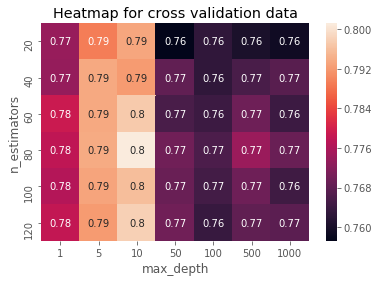

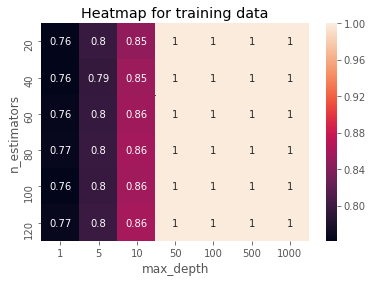

In [0]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in n_estimators:
    for d in dept:
        clf = RandomForestClassifier(max_depth = d,n_estimators = n)
        clf.fit(ohe_x_train,y_train)
        pred_cv = clf.predict_proba(ohe_x_cv)[:,1]
        pred_train = clf.predict_proba(ohe_x_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(y_cv,pred_cv))
        train_auc.append(roc_auc_score(y_train,pred_train))
        
#Heatmap for cross validation data        
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training data')
plt.show()

In [0]:
optimal_n_estimators = model.best_estimator_.n_estimators
optimal_max_depth = model.best_estimator_.max_depth

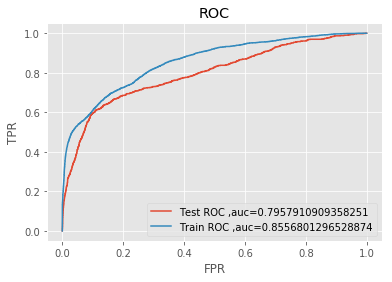

AUC on Test data is 0.7957910909358251
AUC on Train data is 0.8556801296528874
---------------------------


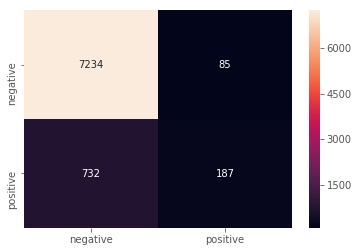

In [0]:
#training our model for max_depth=1000,n_estimators = 120
clf = RandomForestClassifier(max_depth = optimal_max_depth,n_estimators = optimal_n_estimators)
clf.fit(ohe_x_train,y_train)
pred_test =clf.predict_proba(ohe_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(ohe_x_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [0]:
new = ['Random Forest','RandomForestClassifier',"max_depth = 10 & min_samples_split = 60",0.8556,0.7957]
results1.loc[7] = new

## Applying XGBOOST

In [0]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]


param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = XGBClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(ohe_x_train,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal_n_estimators = model.best_estimator_.n_estimators
optimal_max_depth = model.best_estimator_.max_depth


optimal n_estimators 40
optimal max_depth 5


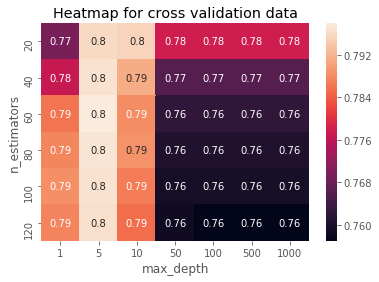

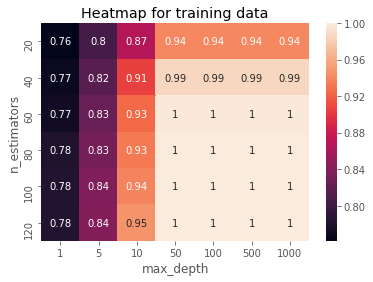

In [0]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in n_estimators:
    for d in dept:
        clf = XGBClassifier(max_depth = d,n_estimators = n)
        clf.fit(ohe_x_train,y_train)
        pred_cv = clf.predict_proba(ohe_x_cv)[:,1]
        pred_train = clf.predict_proba(ohe_x_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(y_cv,pred_cv))
        train_auc.append(roc_auc_score(y_train,pred_train))
optimal_depth=Y[cv_auc.index(max(cv_auc))]   
optimal_n_estimator=X[cv_auc.index(max(cv_auc))]
        
#Heatmap for cross validation data        
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training data')
plt.show()

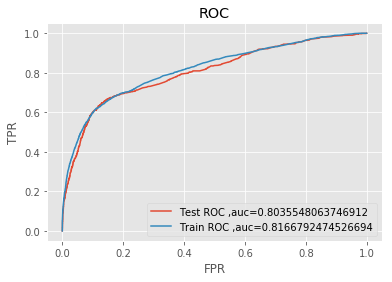

AUC on Test data is 0.8035548063746912
AUC on Train data is 0.8166792474526694
---------------------------


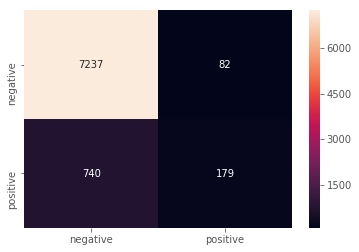

In [0]:
#training our model for max_depth=50,min_samples_split=500
clf = XGBClassifier(max_depth = 5,n_estimators = 40)
clf.fit(ohe_x_train,y_train)
pred_test =clf.predict_proba(ohe_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(ohe_x_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")


In [0]:
new = ['XGBOOST','XGBClassifier',"max_depth = 5 & n_estimators = 40",0.8166,0.8035]
results1.loc[8] = new

# Response-Coding

In [0]:
y_valus ={'yes' : 1, 'no' : 0}
data['y'] = data['y'].map(lambda x: y_valus[x])
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [0]:
y = data['y']

In [0]:
data.drop(['y'], axis = 1, inplace = True) 

In [0]:
data.shape

(41188, 14)

In [0]:
y.head(2)

0    0
1    0
Name: y, dtype: int64

In [0]:
#splitting the data 
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, y, test_size=0.2, random_state=0)
x_train, x_cv, y_train, y_cv = model_selection.train_test_split(x_train, y_train, test_size=0.2)

In [0]:
print("the shape of x_train data,{} and shape of x_test data {}:".format(x_train.shape,x_test.shape))
print("the shape of y_train data,{} and shape of y_test data {}:".format(y_train.shape,y_test.shape))
print("the shape of x_cv data,{} and shape of y_cv data {}:".format(x_cv.shape,y_cv.shape))

the shape of x_train data,(26360, 14) and shape of x_test data (8238, 14):
the shape of y_train data,(26360,) and shape of y_test data (8238,):
the shape of x_cv data,(6590, 14) and shape of y_cv data (6590,):


In [0]:
#Numerical features
real_feature_x_train_age = ['age']
real_feature_x_train_campaign = ['campaign']
real_feature_x_train_previous = ['previous']
real_feature_x_train_emp_var_rate = ['emp.var.rate']
real_feature_x_train_cons_price_idx = ['cons.price.idx']
real_feature_x_train_cons_conf_idx = ['cons.conf.idx']
real_feature_x_train_euribor3m = ['euribor3m']
real_feature_x_train_nr_employed = ['nr.employed']

real_feature_x_test_age = ['age']
real_feature_x_test_campaign = ['campaign']
real_feature_x_test_previous = ['previous']
real_feature_x_test_emp_var_rate = ['emp.var.rate']
real_feature_x_test_cons_price_idx = ['cons.price.idx']
real_feature_x_test_cons_conf_idx = ['cons.conf.idx']
real_feature_x_test_euribor3m = ['euribor3m']
real_feature_x_test_nr_employed = ['nr.employed']

real_feature_x_cv_age = ['age']
real_feature_x_cv_campaign = ['campaign']
real_feature_x_cv_previous = ['previous']
real_feature_x_cv_emp_var_rate = ['emp.var.rate']
real_feature_x_cv_cons_price_idx = ['cons.price.idx']
real_feature_x_cv_cons_conf_idx = ['cons.conf.idx']
real_feature_x_cv_euribor3m = ['euribor3m']
real_feature_x_cv_nr_employed = ['nr.employed']


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
SS = StandardScaler()
SS.fit(x_train[real_feature_x_train_age])
x_train_real_feature_age_scale = SS.transform(x_train[real_feature_x_train_age])
x_test_real_feature_age_scale = SS.transform(x_test[real_feature_x_test_age])
x_cv_real_feature_age_scale = SS.transform(x_cv[real_feature_x_cv_age])

In [0]:
SS.fit(x_train[real_feature_x_train_campaign])
x_train_real_feature_campaign_scale = SS.transform(x_train[real_feature_x_train_campaign])
x_test_real_feature_campaign_scale = SS.transform(x_test[real_feature_x_test_campaign])
x_cv_real_feature_campaign_scale = SS.transform(x_cv[real_feature_x_cv_campaign])

In [0]:
SS.fit(x_train[real_feature_x_train_previous])
x_train_real_feature_previous_scale = SS.transform(x_train[real_feature_x_train_previous])
x_test_real_feature_previous_scale = SS.transform(x_test[real_feature_x_test_previous])
x_cv_real_feature_previous_scale = SS.transform(x_cv[real_feature_x_cv_previous])

In [0]:
SS.fit(x_train[real_feature_x_train_emp_var_rate])
x_train_real_feature_emp_var_rate_scale = SS.transform(x_train[real_feature_x_train_emp_var_rate])
x_test_real_feature_emp_var_rate_scale = SS.transform(x_test[real_feature_x_test_emp_var_rate])
x_cv_real_feature_emp_var_rate_scale = SS.transform(x_cv[real_feature_x_cv_emp_var_rate])

In [0]:
SS.fit(x_train[real_feature_x_train_cons_price_idx])
x_train_real_feature_cons_price_idx_scale = SS.transform(x_train[real_feature_x_train_cons_price_idx])
x_test_real_feature_cons_price_idx_scale = SS.transform(x_test[real_feature_x_test_cons_price_idx])
x_cv_real_feature_cons_price_idx_scale = SS.transform(x_cv[real_feature_x_cv_cons_price_idx])

In [0]:
SS.fit(x_train[real_feature_x_train_cons_conf_idx])
x_train_real_feature_cons_conf_idx_scale = SS.transform(x_train[real_feature_x_train_cons_conf_idx])
x_test_real_feature_cons_conf_idx_scale = SS.transform(x_test[real_feature_x_test_cons_conf_idx])
x_cv_real_feature_cons_conf_idx_scale = SS.transform(x_cv[real_feature_x_cv_cons_conf_idx])

In [0]:
SS.fit(x_train[real_feature_x_train_euribor3m])
x_train_real_feature_euribor3m_scale = SS.transform(x_train[real_feature_x_train_euribor3m])
x_test_real_feature_euribor3m_scale = SS.transform(x_test[real_feature_x_test_euribor3m])
x_cv_real_feature_euribor3m_scale = SS.transform(x_cv[real_feature_x_cv_euribor3m])

In [0]:
SS.fit(x_train[real_feature_x_train_nr_employed])
x_train_real_feature_nr_employed_scale = SS.transform(x_train[real_feature_x_train_nr_employed])
x_test_real_feature_nr_employed_scale = SS.transform(x_test[real_feature_x_test_nr_employed])
x_cv_real_feature_nr_employed_scale = SS.transform(x_cv[real_feature_x_cv_nr_employed])

In [0]:
real_feature_x_train = np.concatenate((x_train_real_feature_age_scale,x_train_real_feature_campaign_scale,x_train_real_feature_previous_scale,x_train_real_feature_emp_var_rate_scale,x_train_real_feature_cons_price_idx_scale,x_train_real_feature_cons_conf_idx_scale,x_train_real_feature_euribor3m_scale,x_train_real_feature_nr_employed_scale),axis = 1)
real_feature_x_test = np.concatenate((x_test_real_feature_age_scale,x_test_real_feature_campaign_scale,x_test_real_feature_previous_scale,x_test_real_feature_emp_var_rate_scale,x_test_real_feature_cons_price_idx_scale,x_test_real_feature_cons_conf_idx_scale,x_test_real_feature_euribor3m_scale,x_test_real_feature_nr_employed_scale),axis = 1)
real_feature_x_cv = np.concatenate((x_cv_real_feature_age_scale,x_cv_real_feature_campaign_scale,x_cv_real_feature_previous_scale,x_cv_real_feature_emp_var_rate_scale,x_cv_real_feature_cons_price_idx_scale,x_cv_real_feature_cons_conf_idx_scale,x_cv_real_feature_euribor3m_scale,x_cv_real_feature_nr_employed_scale),axis = 1)

In [0]:
def get_gv_fea_dict(alpha, feature, df):   
    value_count = x_train[feature].value_counts()

    gv_dict = dict()
    for i, denominator in value_count.items():
        vec = []
        for k in range(1,3):
            cls_cnt = x_train.loc[(y_train==k) & (x_train[feature]==i)]
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 20*alpha))
        gv_dict[i]=vec
    return gv_dict

def get_gv_feature(alpha, feature, df):
    
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    value_count = x_train[feature].value_counts()
    
    
    gv_fea = []
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/2,1/2])
    return gv_fea

In [0]:
#response-coding of the job feature
# alpha is used for laplace smoothing
alpha = 1
# train job feature
train_job_feature_responseCoding = np.array(get_gv_feature(alpha, 'job', x_train))
# test job feature
test_job_feature_responseCoding = np.array(get_gv_feature(alpha, 'job', x_test))
# cross validation job feature
cv_job_feature_responseCoding = np.array(get_gv_feature(alpha, 'job', x_cv))

In [0]:
train_job_feature_responseCoding.shape

(26360, 2)

In [0]:
#response-coding of the marital feature
# alpha is used for laplace smoothing
alpha = 1
# train marital feature
train_marital_feature_responseCoding = np.array(get_gv_feature(alpha, 'marital', x_train))
# test marital feature
test_marital_feature_responseCoding = np.array(get_gv_feature(alpha, 'marital', x_test))
# cross validation marital feature
cv_marital_feature_responseCoding = np.array(get_gv_feature(alpha, 'marital', x_cv))

In [0]:
train_marital_feature_responseCoding.shape

(26360, 2)

In [0]:
#response-coding of the education feature
# alpha is used for laplace smoothing
alpha = 1
# train education feature
train_education_feature_responseCoding = np.array(get_gv_feature(alpha, 'education', x_train))
# test education feature
test_education_feature_responseCoding = np.array(get_gv_feature(alpha, 'education', x_test))
# cross validation education feature
cv_education_feature_responseCoding = np.array(get_gv_feature(alpha, 'education', x_cv))

In [0]:
#response-coding of the housing feature
# alpha is used for laplace smoothing
alpha = 1
# train housing feature
train_housing_feature_responseCoding = np.array(get_gv_feature(alpha, 'housing', x_train))
# test housing feature
test_housing_feature_responseCoding = np.array(get_gv_feature(alpha, 'housing', x_test))
# cross validation housing feature
cv_housing_feature_responseCoding = np.array(get_gv_feature(alpha, 'housing', x_cv))

In [0]:
#response-coding of the loan feature
# alpha is used for laplace smoothing
alpha = 1
# train loan feature
train_loan_feature_responseCoding = np.array(get_gv_feature(alpha, 'loan', x_train))
# test loan feature
test_loan_feature_responseCoding = np.array(get_gv_feature(alpha, 'loan', x_test))
# cross validation loan feature
cv_loan_feature_responseCoding = np.array(get_gv_feature(alpha, 'loan', x_cv))

In [0]:
#response-coding of the poutcome feature
# alpha is used for laplace smoothing
alpha = 1
# train poutcome feature
train_poutcome_feature_responseCoding = np.array(get_gv_feature(alpha, 'poutcome', x_train))
# test poutcome feature
test_poutcome_feature_responseCoding = np.array(get_gv_feature(alpha, 'poutcome', x_test))
# cross validation poutcome feature
cv_poutcome_feature_responseCoding = np.array(get_gv_feature(alpha, 'poutcome', x_cv))

In [0]:
import numpy as np
cat_x_train = np.concatenate((train_job_feature_responseCoding,train_marital_feature_responseCoding,train_education_feature_responseCoding,train_housing_feature_responseCoding,train_loan_feature_responseCoding,train_poutcome_feature_responseCoding),axis = 1)


In [0]:
cat_x_test = np.concatenate((test_job_feature_responseCoding,test_marital_feature_responseCoding,test_education_feature_responseCoding,test_housing_feature_responseCoding,test_loan_feature_responseCoding,test_poutcome_feature_responseCoding),axis = 1)
cat_x_cv = np.concatenate((cv_job_feature_responseCoding,cv_marital_feature_responseCoding,cv_education_feature_responseCoding,cv_housing_feature_responseCoding,cv_loan_feature_responseCoding,cv_poutcome_feature_responseCoding),axis = 1)


In [0]:
cat_x_train.shape

(26360, 12)

In [0]:
cat_x_test.shape

(8238, 12)

In [0]:
cat_x_cv.shape

(6590, 12)

In [0]:
real_feature_x_train.shape

(26360, 8)

In [0]:
type(real_feature_x_train)

numpy.ndarray

In [0]:
type(cat_x_cv)

numpy.ndarray

In [0]:
rc_x_train = np.concatenate((cat_x_train,real_feature_x_train),axis = 1)
rc_x_test = np.concatenate((cat_x_test,real_feature_x_test),axis = 1)
rc_x_cv = np.concatenate((cat_x_cv,real_feature_x_cv),axis = 1)

# Machine Learning Models

## Applying KNN Brute Force Algorithm

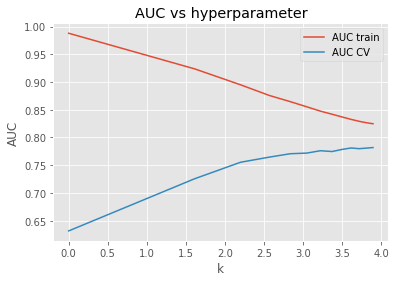

optimal alpha for which auc is maximum :  49


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import math

k = list(range(1,50,4))

train_auc = []
cv_auc = []

for i in k:
    clf = KNeighborsClassifier(n_neighbors = i,algorithm='brute')
    clf.fit(rc_x_train,y_train)
    prob_cv = clf.predict_proba(rc_x_cv)[:,1]
    cv_auc.append(roc_auc_score(y_cv,prob_cv))
    prob_train = clf.predict_proba(rc_x_train)[:,1]
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_k = k[cv_auc.index(max(cv_auc))]
k = [math.log(x) for x in k]

#plot auc vs alpha
x = plt.subplot( )
x.plot(k, train_auc, label='AUC train')
x.plot(k, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_k)


In [0]:
from sklearn.metrics import confusion_matrix

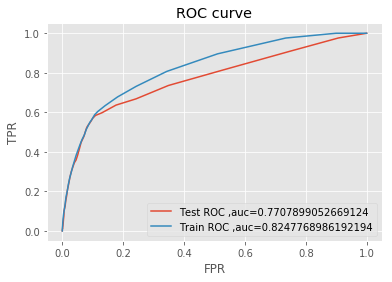

AUC on Test data is 0.7707899052669124
AUC on Train data is 0.8247768986192194
---------------------------


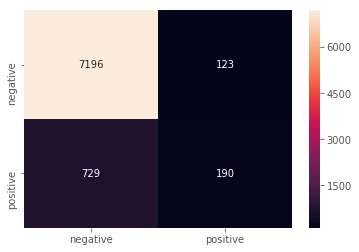

In [0]:
#Testing AUC on Test data
clf = KNeighborsClassifier(n_neighbors = optimal_k,algorithm='brute')
clf.fit(rc_x_train,y_train)
pred_test = clf.predict_proba(rc_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(rc_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [0]:
results2 = pd.DataFrame(columns=['model', 'Classifier' ,"hyper perameter", 'Train-AUC', 'Test-AUC' ])
new = ['KNN with Brute force','KNeighborsClassifier',"k = 49",0.8247,0.7707]
results2.loc[0] = new

## Applying KNN kd-Tree

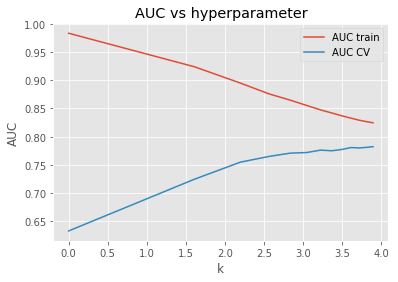

optimal alpha for which auc is maximum :  49


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import math

k = list(range(1,50,4))

train_auc = []
cv_auc = []

for i in k:
    clf = KNeighborsClassifier(n_neighbors = i,algorithm='kd_tree')
    clf.fit(rc_x_train,y_train)
    prob_cv = clf.predict_proba(rc_x_cv)[:,1]
    cv_auc.append(roc_auc_score(y_cv,prob_cv))
    prob_train = clf.predict_proba(rc_x_train)[:,1]
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_k = k[cv_auc.index(max(cv_auc))]
k = [math.log(x) for x in k]

#plot auc vs alpha
x = plt.subplot( )
x.plot(k, train_auc, label='AUC train')
x.plot(k, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_k)


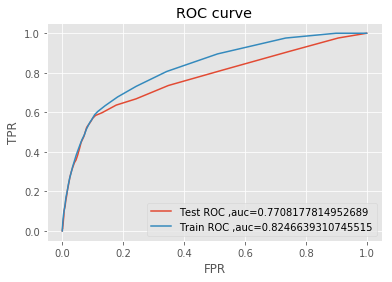

AUC on Test data is 0.7708177814952689
AUC on Train data is 0.8246639310745515
---------------------------


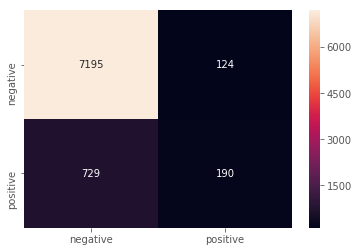

In [0]:
#Testing AUC on Test data
clf = KNeighborsClassifier(n_neighbors = optimal_k,algorithm='kd_tree')
clf.fit(rc_x_train,y_train)
pred_test = clf.predict_proba(rc_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(rc_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [0]:
new = ['KNN with kd-tree','KNeighborsClassifier',"k = 49",0.8246,0.7708]
results2.loc[1] = new

## Applying Logistic Regression with L1 regularization 

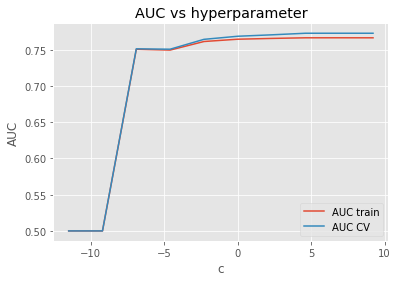

optimal c for which auc is maximum :  1000


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import math

c = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:
    clf = LogisticRegression(penalty='l1',C=i)
    clf.fit(rc_x_train,y_train)
    prob_cv = clf.predict_proba(rc_x_cv)[:,1]
    cv_auc.append(roc_auc_score(y_cv,prob_cv))
    prob_train = clf.predict_proba(rc_x_train)[:,1]
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_c= c[cv_auc.index(max(cv_auc))]
c = [math.log(x) for x in c]

#plot auc vs alpha
x = plt.subplot( )
x.plot(c, train_auc, label='AUC train')
x.plot(c, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('c')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal c for which auc is maximum : ',optimal_c)

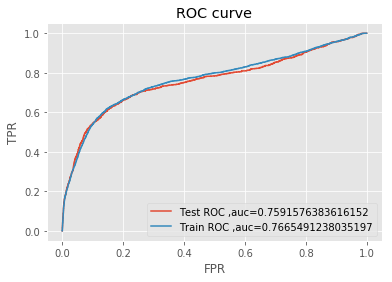

AUC on Test data is 0.7591576383616152
AUC on Train data is 0.7665491238035197
---------------------------


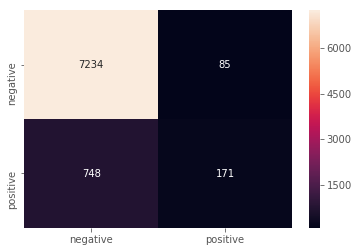

In [0]:
#Testing AUC on Test data
clf = LogisticRegression(penalty='l1',C=optimal_c)
clf.fit(rc_x_train,y_train)
pred_test = clf.predict_proba(rc_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(rc_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train) 


#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
from sklearn.metrics import confusion_matrix
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")



In [0]:
new = ['Logistic Regression with L1','LogisticRegression',"c = 1000",0.7665,0.7591]
results2.loc[2] = new

## Applying Logistic Regression with L2 regularization

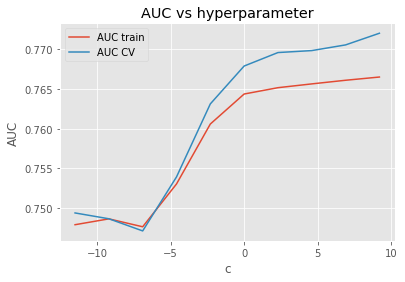

optimal c for which auc is maximum :  10000


In [0]:
c = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:
    clf = LogisticRegression(penalty='l2',C=i)
    clf.fit(rc_x_train,y_train)
    prob_cv = clf.predict_proba(rc_x_cv)[:,1]
    cv_auc.append(roc_auc_score(y_cv,prob_cv))
    prob_train = clf.predict_proba(rc_x_train)[:,1]
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_c= c[cv_auc.index(max(cv_auc))]
c = [math.log(x) for x in c]

#plot auc vs alpha
x = plt.subplot( )
x.plot(c, train_auc, label='AUC train')
x.plot(c, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('c')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal c for which auc is maximum : ',optimal_c)

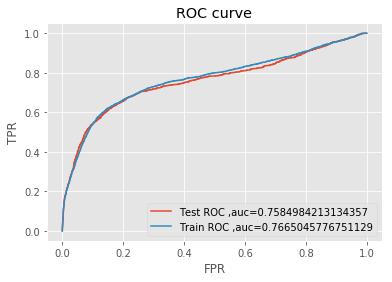

AUC on Test data is 0.7584984213134357
AUC on Train data is 0.7665045776751129
---------------------------


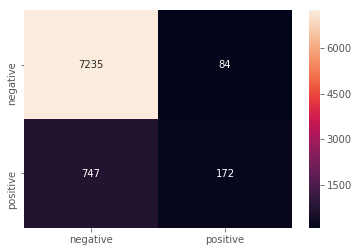

In [0]:
#Testing AUC on Test data
clf = LogisticRegression(penalty='l2',C=optimal_c)
clf.fit(rc_x_train,y_train)
pred_test = clf.predict_proba(rc_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(rc_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train) 


#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")


In [0]:
new = ['Logistic Regression with L2','LogisticRegression',"c = 10000",0.7665,0.7584]
results2.loc[3] = new

## Applying Linear SVM 

In [0]:
import warnings
warnings.filterwarnings("ignore")

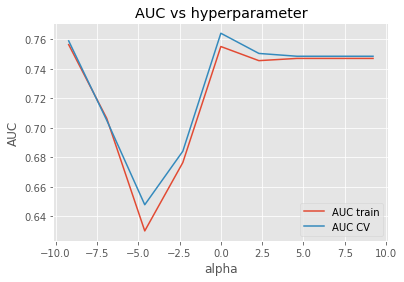

optimal alpha for which auc is maximum :  1


In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
import math

alpha = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001]

train_auc = []
cv_auc = []

for i in alpha:
    model = SGDClassifier(alpha=i, loss = "hinge") 
    clf = CalibratedClassifierCV(model, cv=3)
    clf.fit(rc_x_train,y_train)
    prob_cv = clf.predict_proba(rc_x_cv)[:,1]
    cv_auc.append(roc_auc_score(y_cv,prob_cv))
    prob_train = clf.predict_proba(rc_x_train)[:,1]
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_alpha= alpha[cv_auc.index(max(cv_auc))]
alpha=[math.log(x) for x in alpha]

#plot auc vs alpha
x = plt.subplot( )
x.plot(alpha, train_auc, label='AUC train')
x.plot(alpha, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('alpha')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_alpha)

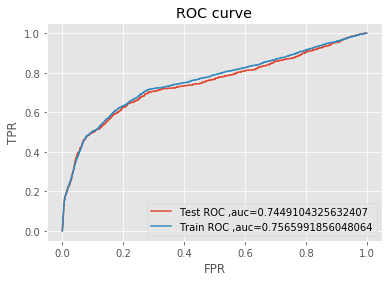

AUC on Test data is 0.7449104325632407
AUC on Train data is 0.7565991856048064
---------------------------


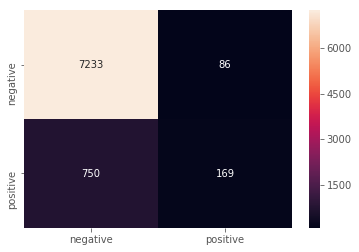

In [0]:
#Testing AUC on Test data
model = SGDClassifier(alpha = optimal_alpha)
clf = CalibratedClassifierCV(model, cv=3)
clf.fit(rc_x_train,y_train)
pred_test = clf.predict_proba(rc_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(rc_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")



In [0]:
new = ['Linear SVM','SGDClassifier',"alpha = 1",0.7565,0.7449]
results2.loc[4] = new

## Applying RBF SVM

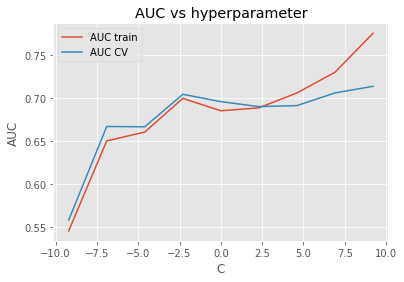

optimal C for which auc is maximum :  [9.210340371976184, 6.907755278982137, 4.605170185988092, 2.302585092994046, 0.0, -2.3025850929940455, -4.605170185988091, -6.907755278982137, -9.210340371976182]


In [0]:
from sklearn.svm import SVC
C = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001]

train_auc = []
cv_auc = []

for i in C:
    model = SVC(C=i) 
    clf = CalibratedClassifierCV(model, cv=3)
    clf.fit(rc_x_train,y_train)
    prob_cv = clf.predict_proba(rc_x_cv)[:,1]
    cv_auc.append(roc_auc_score(y_cv,prob_cv))
    prob_train = clf.predict_proba(rc_x_train)[:,1]
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_C= C[cv_auc.index(max(cv_auc))]
C=[math.log(x) for x in C]

#plot auc vs alpha
x = plt.subplot( )
x.plot(C, train_auc, label='AUC train')
x.plot(C, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('C')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal C for which auc is maximum : ',C)

In [0]:
print('optimal C for which auc is maximum : ',optimal_C)

optimal C for which auc is maximum :  10000


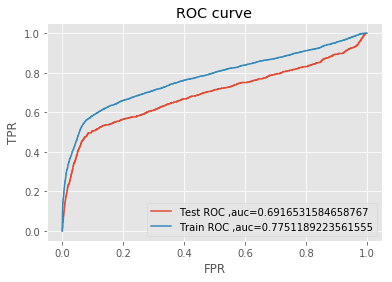

AUC on Test data is 0.6916531584658767
AUC on Train data is 0.7751189223561555
---------------------------


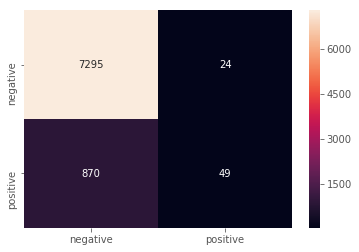

In [0]:
#Testing AUC on Test data
model =SVC(C = optimal_C)
clf = CalibratedClassifierCV(model, cv=3)
clf.fit(rc_x_train,y_train)
pred_test = clf.predict_proba(rc_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(rc_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [0]:
new = ['RBF SVM','SVC',"alpha = 10000 ",0.7751,0.6916]
results2.loc[5] = new

## Applying Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
min_samples =  [5, 10, 100, 500]


param_grid={'min_samples_split':min_samples , 'max_depth':dept}
clf = DecisionTreeClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(rc_x_train,y_train)
print("optimal min_samples_split",model.best_estimator_.min_samples_split)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal min_samples_split 500
optimal max_depth 5


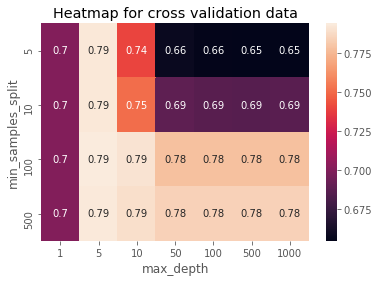

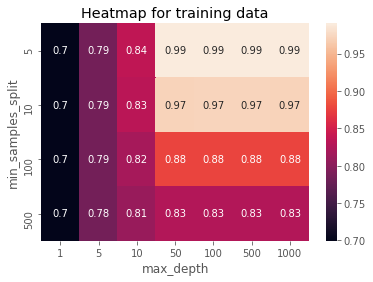

In [0]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in min_samples:
    for d in dept:
        clf = DecisionTreeClassifier(max_depth = d,min_samples_split = n)
        clf.fit(rc_x_train,y_train)
        pred_cv = clf.predict_proba(rc_x_cv)[:,1]
        pred_train = clf.predict_proba(rc_x_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(y_cv,pred_cv))
        train_auc.append(roc_auc_score(y_train,pred_train))
        
#Heatmap for cross validation data        
data = pd.DataFrame({'min_samples_split': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("min_samples_split", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'min_samples_split': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("min_samples_split", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training data')
plt.show()

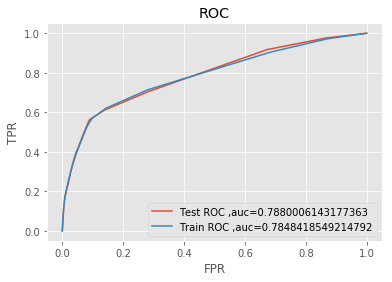

AUC on Test data is 0.7880006143177363
AUC on Train data is 0.7848418549214792
---------------------------


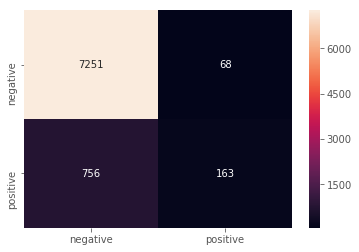

In [0]:
#training our model for max_depth=50,min_samples_split=500
clf = DecisionTreeClassifier(max_depth = 5,min_samples_split = 500)
clf.fit(rc_x_train,y_train)
pred_test =clf.predict_proba(rc_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(rc_x_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [0]:
new = ['Decision Tree','DecisionTreeClassifier',"max_depth = 5 & min_samples_split = 500",0.7848,0.7880]
results2.loc[6] = new

## Applying Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]


param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(rc_x_train,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal n_estimators 120
optimal max_depth 10


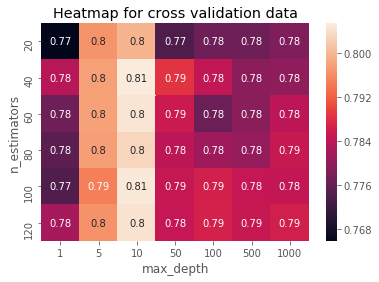

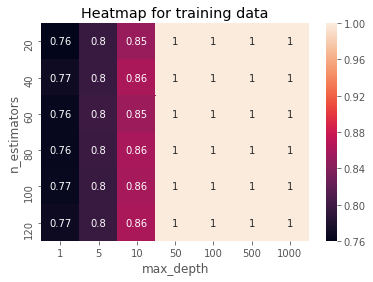

In [0]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in n_estimators:
    for d in dept:
        clf = RandomForestClassifier(max_depth = d,n_estimators = n)
        clf.fit(rc_x_train,y_train)
        pred_cv = clf.predict_proba(rc_x_cv)[:,1]
        pred_train = clf.predict_proba(rc_x_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(y_cv,pred_cv))
        train_auc.append(roc_auc_score(y_train,pred_train))
        
#Heatmap for cross validation data        
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training data')
plt.show()

In [0]:
optimal_n_estimators = model.best_estimator_.n_estimators
optimal_max_depth = model.best_estimator_.max_depth

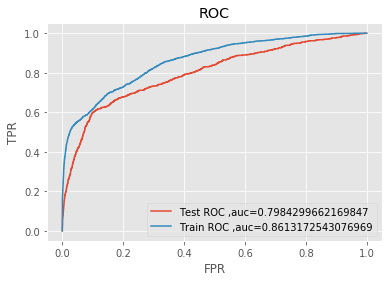

AUC on Test data is 0.7984299662169847
AUC on Train data is 0.8613172543076969
---------------------------


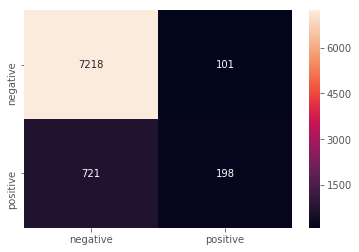

In [0]:
#training our model for max_depth=1000,n_estimators = 120
clf = RandomForestClassifier(max_depth = 10,n_estimators = 120)
clf.fit(rc_x_train,y_train)
pred_test =clf.predict_proba(rc_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(rc_x_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [0]:
new = ['Random Forest','RandomForestClassifier',"max_depth = 10 & min_samples_split = 120",0.8613,0.7984]
results2.loc[7] = new

## Applying XGBOOST

In [0]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]


param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = XGBClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(rc_x_train,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal_n_estimators = model.best_estimator_.n_estimators
optimal_max_depth = model.best_estimator_.max_depth


optimal n_estimators 40
optimal max_depth 5


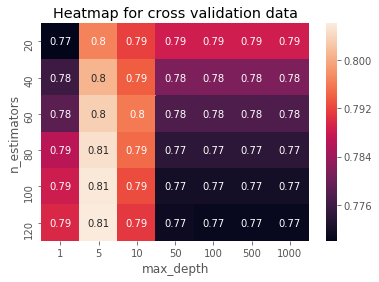

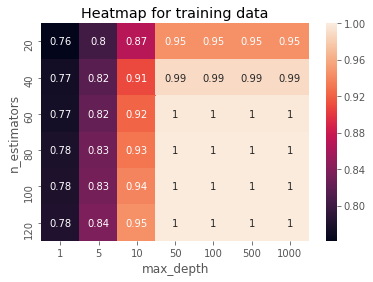

In [0]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in n_estimators:
    for d in dept:
        clf = XGBClassifier(max_depth = d,n_estimators = n)
        clf.fit(rc_x_train,y_train)
        pred_cv = clf.predict_proba(rc_x_cv)[:,1]
        pred_train = clf.predict_proba(rc_x_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(y_cv,pred_cv))
        train_auc.append(roc_auc_score(y_train,pred_train))
optimal_depth=Y[cv_auc.index(max(cv_auc))]   
optimal_n_estimator=X[cv_auc.index(max(cv_auc))]
        
#Heatmap for cross validation data        
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training data')
plt.show()

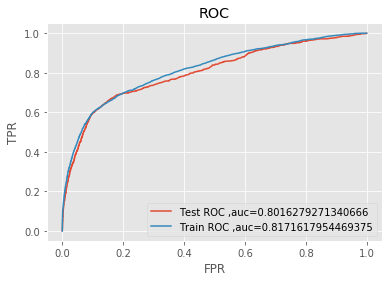

AUC on Test data is 0.8016279271340666
AUC on Train data is 0.8171617954469375
---------------------------


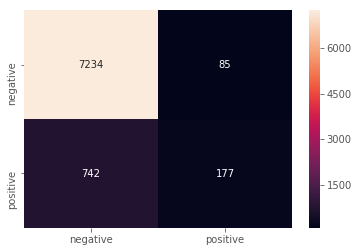

In [0]:
#training our model for max_depth=50,min_samples_split=500
clf = XGBClassifier(max_depth = 5,n_estimators = 40)
clf.fit(rc_x_train,y_train)
pred_test =clf.predict_proba(rc_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(rc_x_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")


In [0]:
new = ['XGBOOST','XGBClassifier',"max_depth = 5 & n_estimators = 40",0.8171,0.8016]
results2.loc[8] = new

## LabelEncoder Performance Table

In [0]:
results

,model,Classifier,hyper perameter,Train-AUC,Test-AUC
0,KNN with Brute force,KNeighborsClassifier,k = 37,0.8288,0.7587
1,KNN with kd-tree,KNeighborsClassifier,k = 33,0.8322,0.7573
2,Logistic Regression with L1,LogisticRegression,c = 10000,0.7642,0.7593
4,Linear SVM,SGDClassifier,alpha = 0.01,0.7537,0.7434
5,RBF SVM,SVC,c = 0.01,0.8771,0.7272
6,Decision Tree,DecisionTreeClassifier,max_depth = 10 & min_samples_split = 500,0.8131,0.7925
7,Random Forest,RandomForestClassifier,max_depth = 10 & min_samples_split = 100,0.8650,0.8035
8,XGBOOST,XGBClassifier,max_depth = 5 & n_estimators = 60,0.8267,0.8091


## OneHotEncoder Performance Table

In [0]:
results1

,model,Classifier,hyper perameter,Train-AUC,Test-AUC
0,KNN with Brute force,KNeighborsClassifier,k = 49,0.8209,0.7657
1,KNN with kd-tree,KNeighborsClassifier,k = 49,0.8209,0.7657
2,Logistic Regression with L1,LogisticRegression,c = 1,0.7675,0.7593
3,Logistic Regression with L2,LogisticRegression,c = 1,0.7676,0.7593
4,Linear SVM,SGDClassifier,alpha = 0.0001,0.7113,0.7164
5,RBF SVM,SVC,alpha = 10,0.7883,0.7008
6,Decision Tree,DecisionTreeClassifier,max_depth = 10 & min_samples_split = 500,0.8112,0.7964
7,Random Forest,RandomForestClassifier,max_depth = 10 & min_samples_split = 60,0.8556,0.7957
8,XGBOOST,XGBClassifier,max_depth = 5 & n_estimators = 40,0.8166,0.8035


##Responce-Coding Performance Table

In [0]:
results2

,model,Classifier,hyper perameter,Train-AUC,Test-AUC
0,KNN with Brute force,KNeighborsClassifier,k = 49,0.8247,0.7707
1,KNN with kd-tree,KNeighborsClassifier,k = 49,0.8246,0.7708
2,Logistic Regression with L1,LogisticRegression,c = 1000,0.7665,0.7591
3,Logistic Regression with L2,LogisticRegression,c = 10000,0.7665,0.7584
4,Linear SVM,SGDClassifier,alpha = 1,0.7565,0.7449
5,RBF SVM,SVC,alpha = 10000,0.7751,0.6916
6,Decision Tree,DecisionTreeClassifier,max_depth = 5 & min_samples_split = 500,0.7848,0.7880
7,Random Forest,RandomForestClassifier,max_depth = 10 & min_samples_split = 120,0.8613,0.7984
8,XGBOOST,XGBClassifier,max_depth = 5 & n_estimators = 40,0.8171,0.8016


## Conclusion:

1. We load the data using pandas and do some Exploratory Data Analysis techniques

2. After applying the EDA we know some features are not importent then remove that features

3. We are using AUC as metric because this is higly imbalanced dataset

3. We split the whole data as train,test and cv then apply LabelEncoder to encode the all catagorical features  

4. Apply all Machine Learning algorithms like KNN, Logistic Regression,Linear SVM, RBF SVM, Decision Tree, Random Forest and XGBoost with hyperparameter tuning

5. Decision Tree, Random Forest and XGBoost with some hyperparameter tuning gives best AUC values = 0.7925 , 0.8035 and 0.8091

5. Now we use OneHotEncoder to encode the all catagorical features

6. Apply all these Machine Learning algorithms with some hyperparameter tunings

7. When we use OneHotEncoder Decision Tree, Random Forest and XGBoost gives best Auc = 0.7964, 0.7957 & 0.8035

8. Fianlly we use respoce-coding to encode the categorical data and apply some machine learnig model with hyperparameter tuning 

9. Random Forest and XGBoost gives best result AUC = 0.7984 & 0.8016
